# Part I - (Investigation of Prosper Loan Data)
## by (Oluwatobiloba Oshinuga)

## Introduction
I conducted an Explanatory Data Analysis on a dataset which contains 113,937 loan with 81 variables on each loan, including loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others from Prosper. Prosper is America's first marketplace lending platform with over 9 billion dollars in funded loans. I will be looking at different factors that influences the Loan status outcome, Borrowers rate, and Lenders yield and how these factors acts as criterias that determines the Loan amount each borrowers qualifies to obtain.




## Preliminary Wrangling


In [332]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [333]:
# load data
df = pd.read_csv('prosperLoanData.csv')

In [334]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [335]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [336]:
#pd.set_option("display.max_rows", None)

# Sum of missing values
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [337]:
# sum of missing values expressed as percentage
df.isna().sum()/len(df)  * 100

ListingKey                      0.000000
ListingNumber                   0.000000
ListingCreationDate             0.000000
CreditGrade                    74.588588
Term                            0.000000
                                 ...    
PercentFunded                   0.000000
Recommendations                 0.000000
InvestmentFromFriendsCount      0.000000
InvestmentFromFriendsAmount     0.000000
Investors                       0.000000
Length: 81, dtype: float64

## Data Cleaning

The data currently have 113,937 rows and 81 features or columns. Columns in our dataset with lot of missing values and won't be necessary for my Analysis will be dropped.

### Issue #1: Drop Unnecessary Features

Columns not important to our Analysis should be dropped. It will help reduce the storage capacity of data and improve processing time.

In [338]:
# list of columns not needed in my analysis
delete_columns = ['ListingKey', 'ListingNumber','BorrowerState', 'Occupation','CurrentlyInGroup', 
       'DateCreditPulled', 'FirstRecordedCreditLine','TotalCreditLinespast7years','OpenRevolvingAccounts', 
       'OpenRevolvingMonthlyPayment','InquiriesLast6Months', 'TotalInquiries', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months','RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades','TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'IncomeVerifiable','LoanKey', 'LoanNumber','LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'LP_ServiceFees','LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments','Recommendations','InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 
       'ProsperRating (numeric)', 'IncomeVerifiable', 'ListingCreationDate']

# drop columns
df_clean = df.drop(columns= delete_columns)

In [339]:
df_clean.head(10)

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,PercentFunded,Investors
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,0,NaN,78,9425,330.43,11396.14,9425.00,1971.14,1.0,258
1,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0,NaN,0,10000,318.93,0.00,0.00,0.00,1.0,1
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,0,NaN,86,3001,123.32,4186.63,3001.00,1185.63,1.0,41
3,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,0,NaN,16,10000,321.45,5143.20,4091.09,1052.11,1.0,158
4,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,0,NaN,6,15000,563.97,2819.85,1563.22,1256.63,1.0,20
5,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,...,0,NaN,3,15000,342.37,679.34,351.89,327.45,1.0,1
6,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,...,0,NaN,11,3000,122.67,1226.70,604.25,622.45,1.0,1
7,NaN,36,Current,NaN,0.23939,0.2019,0.1919,0.17830,0.0799,0.09840,...,0,NaN,10,10000,372.60,3353.40,1955.89,1397.51,1.0,1
8,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,...,0,NaN,3,10000,305.54,611.08,505.58,105.50,1.0,1
9,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,...,0,NaN,3,10000,305.54,611.08,505.58,105.50,1.0,1


### Issue #2. Taking Care of Missing Values in Data

1. These columns ('TotalProsperLoans','TotalProsperPaymentsBilled', 'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding') share missingness relationship(missing at random)because 80% of borrowers had no prior loans. They show 80% of missing values and would be dropped alongside other columns with more than 50% missing values.

2. These columns ('EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore') also share missingness relationship(missing at random) because these features only contain data of borrower from July, 2009. Year 2009 and above will be good dates to center our analysis on. Removing the missing rows from the columns won't be a bad idea

**1. Drop columns with more than 50% missing values**

In [340]:
# Percentage estimation of missing values in each column
missing_percent = df_clean.isna().sum()/ df.shape[0] * 100
missing_percent

CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
EmploymentStatus                        1.979164
EmploymentStatusDuration                6.692295
IsBorrowerHomeowner                     0.000000
GroupKey                               88.290898
CreditScoreRangeLower                   0.518708
CreditScoreRangeUpper                   0.518708
CurrentCreditLines                      6.673864
OpenCreditLines     

In [341]:
# Get columns with more than 50% missing values
missing_col = missing_percent.where(missing_percent > 50).dropna()
missing_col.index

Index(['CreditGrade', 'ClosedDate', 'GroupKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')

In [342]:
# drop columns with more than 50% missing values
column = missing_col.index
df_clean.drop(columns=column, axis=1, inplace=True)

In [343]:
# dataset shape
df_clean.shape

(113937, 32)

**2. Drop rows in ('EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore') columns with Null values**

In [344]:
# Percentage estimation of missing values in each column
df_clean.isna().sum()/ df.shape[0] * 100

Term                             0.000000
LoanStatus                       0.000000
BorrowerAPR                      0.021942
BorrowerRate                     0.000000
LenderYield                      0.000000
EstimatedEffectiveYield         25.526387
EstimatedLoss                   25.526387
EstimatedReturn                 25.526387
ProsperRating (Alpha)           25.526387
ProsperScore                    25.526387
ListingCategory (numeric)        0.000000
EmploymentStatus                 1.979164
EmploymentStatusDuration         6.692295
IsBorrowerHomeowner              0.000000
CreditScoreRangeLower            0.518708
CreditScoreRangeUpper            0.518708
CurrentCreditLines               6.673864
OpenCreditLines                  6.673864
CurrentDelinquencies             0.611742
AmountDelinquent                 6.689662
DebtToIncomeRatio                7.507658
IncomeRange                      0.000000
StatedMonthlyIncome              0.000000
LoanCurrentDaysDelinquent        0

In [345]:
#drop missings rows from the column list
column = ['EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn','ProsperRating (Alpha)','ProsperScore']
df_clean.dropna(subset=column, inplace=True)

In [346]:
# Percentage estimation of missing values in each column
df_clean.isna().sum()/ df.shape[0] * 100

Term                            0.000000
LoanStatus                      0.000000
BorrowerAPR                     0.000000
BorrowerRate                    0.000000
LenderYield                     0.000000
EstimatedEffectiveYield         0.000000
EstimatedLoss                   0.000000
EstimatedReturn                 0.000000
ProsperRating (Alpha)           0.000000
ProsperScore                    0.000000
ListingCategory (numeric)       0.000000
EmploymentStatus                0.000000
EmploymentStatusDuration        0.016676
IsBorrowerHomeowner             0.000000
CreditScoreRangeLower           0.000000
CreditScoreRangeUpper           0.000000
CurrentCreditLines              0.000000
OpenCreditLines                 0.000000
CurrentDelinquencies            0.000000
AmountDelinquent                0.000000
DebtToIncomeRatio               6.403539
IncomeRange                     0.000000
StatedMonthlyIncome             0.000000
LoanCurrentDaysDelinquent       0.000000
LoanMonthsSinceO

We still have few missing rows in data. (DebtToIncomeRatio --6.4%, EmploymentStatusDuration-- 0.02%). They should be dropped

In [347]:
# drop all missing values
df_clean.dropna(inplace=True)

In [348]:
# All missing values have been taking care of
df_clean.isna().any()

Term                            False
LoanStatus                      False
BorrowerAPR                     False
BorrowerRate                    False
LenderYield                     False
EstimatedEffectiveYield         False
EstimatedLoss                   False
EstimatedReturn                 False
ProsperRating (Alpha)           False
ProsperScore                    False
ListingCategory (numeric)       False
EmploymentStatus                False
EmploymentStatusDuration        False
IsBorrowerHomeowner             False
CreditScoreRangeLower           False
CreditScoreRangeUpper           False
CurrentCreditLines              False
OpenCreditLines                 False
CurrentDelinquencies            False
AmountDelinquent                False
DebtToIncomeRatio               False
IncomeRange                     False
StatedMonthlyIncome             False
LoanCurrentDaysDelinquent       False
LoanMonthsSinceOrigination      False
LoanOriginalAmount              False
MonthlyLoanP

In [349]:
# Check for duplicate rows
df_clean[df_clean.duplicated()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (Alpha),ProsperScore,...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,PercentFunded,Investors


### Issue #3: Invalid Value and Characters in IncomeRange Column

1. We have Inavalid value in **IncomeRange** column('Not employed'). It will be changed to 0, meaning the borrower had no job and no income.
2. Invalid characters e.g($, +, and comma) in **IncomeRange** column should be removed.
3. **IncomeRange** column contains the range of borrower's income(Upper and lower). For the sake of my analysis, I will find the average and record in a new column called ***Income***

**1. Inavalid value in IncomeRange column('Not employed') will be changed to 0**

In [350]:
df_clean.loc[df_clean['IncomeRange'] == 'Not employed', 'IncomeRange']

21386    Not employed
Name: IncomeRange, dtype: object

In [351]:
# IncomeRange changed from Not employed to 0
df_clean.loc[df_clean['IncomeRange'] == 'Not employed', 'IncomeRange'] = '$0'

**2. Invalid characters in IncomeRange are removed and values are splitted into upper and lower values separately**

In [352]:
# get the lower and upper range of IncomeRange seperately into incomes list
# Remove characters ($ + ,)
incomes = []
for n in range(2):
    income = df_clean['IncomeRange'].apply(lambda x: int(x.split('-')[n].replace(',', '').strip('$+'))
                                             if len(x.split('-')) > n else 0)
    incomes.append(income)

**3. Average of upper and lower Income replaces IncomeRange**

In [353]:
# get the average of upper and lower IncomeRange and save in a new column Income
df_clean['AverageIncome'] = ((incomes[0] + incomes[1])/2).astype(int) 

In [354]:
#unique values 
df_clean['AverageIncome'].unique()

array([62499, 37499, 50000, 87499, 12500,     0])

In [355]:
# drop IncomeRange column(which has been replaced with Income column)
df_clean.drop(columns='IncomeRange', inplace=True)

In [356]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Term                          77543 non-null  int64  
 1   LoanStatus                    77543 non-null  object 
 2   BorrowerAPR                   77543 non-null  float64
 3   BorrowerRate                  77543 non-null  float64
 4   LenderYield                   77543 non-null  float64
 5   EstimatedEffectiveYield       77543 non-null  float64
 6   EstimatedLoss                 77543 non-null  float64
 7   EstimatedReturn               77543 non-null  float64
 8   ProsperRating (Alpha)         77543 non-null  object 
 9   ProsperScore                  77543 non-null  float64
 10  ListingCategory (numeric)     77543 non-null  int64  
 11  EmploymentStatus              77543 non-null  object 
 12  EmploymentStatusDuration      77543 non-null  float64
 13  

### Issue #4 : Incorrect Dtype for ProsperRating (Alpha) Column

ProsperRating (Alpha) column should be converted from object to ordered categorical types

1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.
 AA - HR

In [357]:
# unique values for ProsperRating(Alpha)
df_clean['ProsperRating (Alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [358]:
# convert ProsperRating (Alpha) column into ordered categorical types
var = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var)
df_clean['ProsperRating (Alpha)'] = df_clean['ProsperRating (Alpha)'].astype(ordered_var)

In [359]:
# Rename ProsperRating (Alpha) to ProsperRating 
df_clean.rename(columns={'ProsperRating (Alpha)': 'ProsperRating'}, inplace= True)

In [360]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Term                          77543 non-null  int64   
 1   LoanStatus                    77543 non-null  object  
 2   BorrowerAPR                   77543 non-null  float64 
 3   BorrowerRate                  77543 non-null  float64 
 4   LenderYield                   77543 non-null  float64 
 5   EstimatedEffectiveYield       77543 non-null  float64 
 6   EstimatedLoss                 77543 non-null  float64 
 7   EstimatedReturn               77543 non-null  float64 
 8   ProsperRating                 77543 non-null  category
 9   ProsperScore                  77543 non-null  float64 
 10  ListingCategory (numeric)     77543 non-null  int64   
 11  EmploymentStatus              77543 non-null  object  
 12  EmploymentStatusDuration      77543 non-null 

### Issue #5: CreditScoreRangeLower and CreditScoreRangeUpper Column

Each observable unit should represent one Feature.  CreditScoreRangeLower and CreditScoreRangeUpper would be merged into another column CreditScore by getting their average.

In [361]:
# Get the average of CreditScoreRangeLower and CreditScoreRangeUpper into one column CreditScore
df_clean['CreditScore'] = (df_clean.CreditScoreRangeLower + df_clean.CreditScoreRangeUpper)/ 2

In [362]:
df_clean['CreditScore']

1         689.5
3         809.5
4         689.5
5         749.5
6         689.5
          ...  
113932    709.5
113933    709.5
113934    709.5
113935    689.5
113936    689.5
Name: CreditScore, Length: 77543, dtype: float64

In [363]:
#drop CreditScoreRangeLower and CreditScoreRangeUpper column from the dataset
df_clean.drop(columns= ['CreditScoreRangeLower', 'CreditScoreRangeUpper'], inplace=True )

### Issue #6: ListingCategory (numeric) Column requires transformation

ListingCategory (numeric) should be changed from it numerical format to a qualitative or alphabetical format, using the description as provided in the dataset dictionary. Alphabetical format will make my analysis better.

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [364]:
#replace quantitative variable with qualitative variable
df_clean['ListingCategory (numeric)'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 
    'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 
    'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
    'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'], inplace=True)

In [365]:
# Rename the column
df_clean.rename(columns= {'ListingCategory (numeric)' : 'ListingCategory'}, inplace=True)

#changing the dtype to categorical
df_clean['ListingCategory'] = df_clean['ListingCategory'].astype('category')

In [366]:
loan_df = df_clean.copy()

In [367]:
# high-level overview of data shape and composition of cleaned data
print(loan_df.shape)
print(loan_df.dtypes)
print(loan_df.head(10))

(77543, 31)
Term                               int64
LoanStatus                        object
BorrowerAPR                      float64
BorrowerRate                     float64
LenderYield                      float64
EstimatedEffectiveYield          float64
EstimatedLoss                    float64
EstimatedReturn                  float64
ProsperRating                   category
ProsperScore                     float64
ListingCategory                 category
EmploymentStatus                  object
EmploymentStatusDuration         float64
IsBorrowerHomeowner                 bool
CurrentCreditLines               float64
OpenCreditLines                  float64
CurrentDelinquencies             float64
AmountDelinquent                 float64
DebtToIncomeRatio                float64
StatedMonthlyIncome              float64
LoanCurrentDaysDelinquent          int64
LoanMonthsSinceOrigination         int64
LoanOriginalAmount                 int64
MonthlyLoanPayment               float64
LP_C

In [368]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Term                          77543 non-null  int64   
 1   LoanStatus                    77543 non-null  object  
 2   BorrowerAPR                   77543 non-null  float64 
 3   BorrowerRate                  77543 non-null  float64 
 4   LenderYield                   77543 non-null  float64 
 5   EstimatedEffectiveYield       77543 non-null  float64 
 6   EstimatedLoss                 77543 non-null  float64 
 7   EstimatedReturn               77543 non-null  float64 
 8   ProsperRating                 77543 non-null  category
 9   ProsperScore                  77543 non-null  float64 
 10  ListingCategory               77543 non-null  category
 11  EmploymentStatus              77543 non-null  object  
 12  EmploymentStatusDuration      77543 non-null 

In [369]:
loan_df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,CurrentCreditLines,...,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,PercentFunded,Investors,AverageIncome,CreditScore
count,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,...,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,42.724630,0.223727,0.193408,0.183403,0.166606,0.078594,0.095287,6.062030,104.240757,10.590601,...,15.723676,9269.504688,295.759460,3691.998460,2651.812074,1040.186387,0.998163,69.229692,55062.549992,708.502618
std,11.712344,0.079159,0.073898,0.073898,0.067387,0.045937,0.029893,2.362402,96.790960,5.316312,...,13.821928,6398.196398,189.326004,4278.430666,3676.713973,1131.420137,0.020397,97.434530,19601.298780,47.161527
min,12.000000,0.045830,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,0.000000,0.000000,...,0.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,0.700000,1.000000,0.000000,609.500000
25%,36.000000,0.161750,0.134900,0.124900,0.115000,0.042400,0.074080,4.000000,31.000000,7.000000,...,4.000000,4000.000000,158.490000,796.141600,392.760000,253.767350,1.000000,1.000000,37499.000000,669.500000
50%,36.000000,0.215660,0.184500,0.174500,0.157600,0.069900,0.090600,6.000000,75.000000,10.000000,...,11.000000,8000.000000,256.390000,2224.080000,1253.850000,675.930000,1.000000,31.000000,50000.000000,709.500000
75%,60.000000,0.287800,0.252400,0.242400,0.217000,0.108000,0.115000,8.000000,149.000000,13.000000,...,24.000000,14500.000000,392.280000,4903.010000,3433.690000,1434.238400,1.000000,99.000000,62499.000000,729.500000
max,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.266700,11.000000,755.000000,59.000000,...,56.000000,35000.000000,2251.510000,37369.160000,35000.000000,10572.780000,1.012500,1189.000000,87499.000000,889.500000


### What is the structure of your dataset?

> There are 77543 loans and 31 Features in my data. Most of the variables are numeric in nature but the variable ProsperRating is an ordered factor variable with the following levels.
(best) ——> (worst)
ProsperRating: 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. AA - HR


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the BorrowerRate, LoanStatus, LenderYield and LoanAmount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that LoanAmount and Income will have the strongest effect on BorrowerRate, LenderYield and LoanStatus. I also expect borrowers with high credit score would be legible for larger LoanAmount. 

In [370]:
loan_df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,CurrentCreditLines,...,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,PercentFunded,Investors,AverageIncome,CreditScore
count,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,...,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,42.724630,0.223727,0.193408,0.183403,0.166606,0.078594,0.095287,6.062030,104.240757,10.590601,...,15.723676,9269.504688,295.759460,3691.998460,2651.812074,1040.186387,0.998163,69.229692,55062.549992,708.502618
std,11.712344,0.079159,0.073898,0.073898,0.067387,0.045937,0.029893,2.362402,96.790960,5.316312,...,13.821928,6398.196398,189.326004,4278.430666,3676.713973,1131.420137,0.020397,97.434530,19601.298780,47.161527
min,12.000000,0.045830,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,0.000000,0.000000,...,0.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,0.700000,1.000000,0.000000,609.500000
25%,36.000000,0.161750,0.134900,0.124900,0.115000,0.042400,0.074080,4.000000,31.000000,7.000000,...,4.000000,4000.000000,158.490000,796.141600,392.760000,253.767350,1.000000,1.000000,37499.000000,669.500000
50%,36.000000,0.215660,0.184500,0.174500,0.157600,0.069900,0.090600,6.000000,75.000000,10.000000,...,11.000000,8000.000000,256.390000,2224.080000,1253.850000,675.930000,1.000000,31.000000,50000.000000,709.500000
75%,60.000000,0.287800,0.252400,0.242400,0.217000,0.108000,0.115000,8.000000,149.000000,13.000000,...,24.000000,14500.000000,392.280000,4903.010000,3433.690000,1434.238400,1.000000,99.000000,62499.000000,729.500000
max,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.266700,11.000000,755.000000,59.000000,...,56.000000,35000.000000,2251.510000,37369.160000,35000.000000,10572.780000,1.012500,1189.000000,87499.000000,889.500000


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerRate and LenderYield.

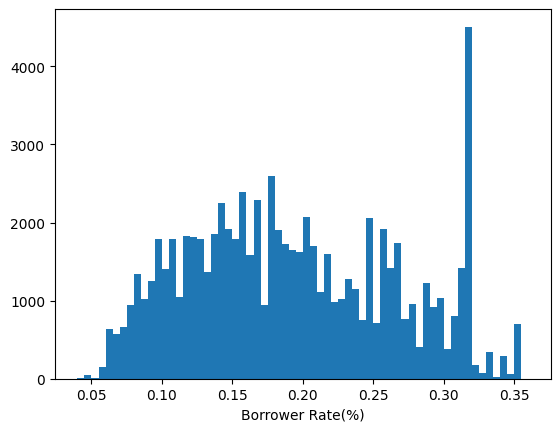

In [371]:
bins = np.arange(loan_df['BorrowerRate'].min(), loan_df['BorrowerRate'].max()+0.005, 0.005)
plt.hist(data=loan_df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate(%)');

The interest rate for almost 5000 borrowers falls within the range of 0.315 and 0.320%, there is a large frequency spike for the interest rate within this range. This interest rate represents the highest rate charged by the bank for all loans.These probably represent the standard interest rate charged by the bank for loans above the average scale.
The next most frequent interest rate is within the range of 0.18 to 0.185% for about 2500 borrowers and could be interest rate charge for loans within the average scale. The distribution of this plot is left skewed.

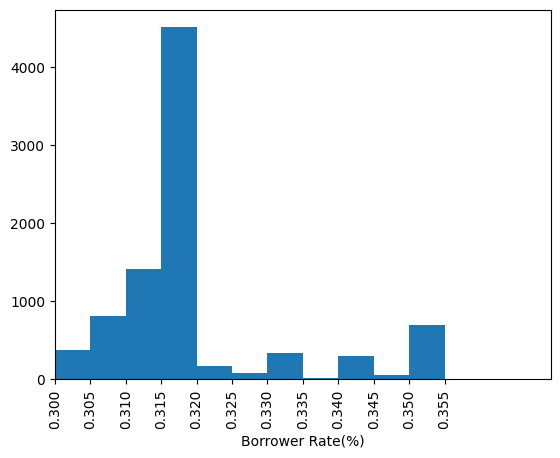

In [372]:
# Taking a better look on interest rate greater than 0.3%
bins = np.arange(loan_df['BorrowerRate'].min(), loan_df['BorrowerRate'].max()+0.005, 0.005)
plt.xlim(0.3,0.37)
ticks = np.arange(0.3, 0.36, 0.005)
labels = ['{:.3f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.hist(data=loan_df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate(%)');

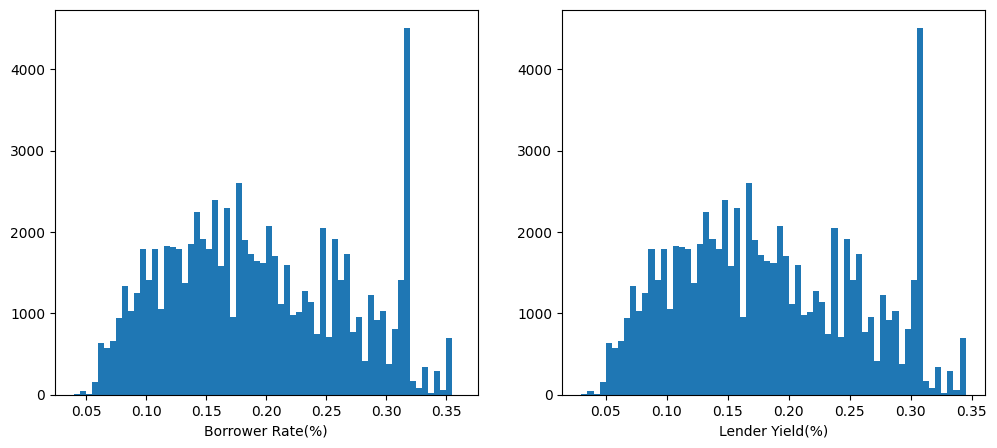

In [373]:
plt.figure(figsize = [12, 5])

#Histogram on the left
plt.subplot(1, 2, 1)
bins = np.arange(loan_df['BorrowerRate'].min(), loan_df['BorrowerRate'].max()+0.005, 0.005)
plt.hist(data=loan_df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate(%)');

#Histogram on the right
plt.subplot(1, 2, 2)
bins = np.arange(loan_df['LenderYield'].min(), loan_df['LenderYield'].max()+0.005, 0.005)
plt.hist(data=loan_df, x='LenderYield', bins=bins)
plt.xlabel('Lender Yield(%)');

The left histogram is the Borrower's rate, the right is the Lender's Yield. They both have a very similar distribution meaning both variables are highly correlated. Borrower rate of range 0.315 to 0.320 have a considerably high frequncy which is same for Lender Yield. It can be deduced that the Borrower's rate impacts the Lender's Yield by no small amount.

Next Up, Is another variable of Interest: LoanAmount

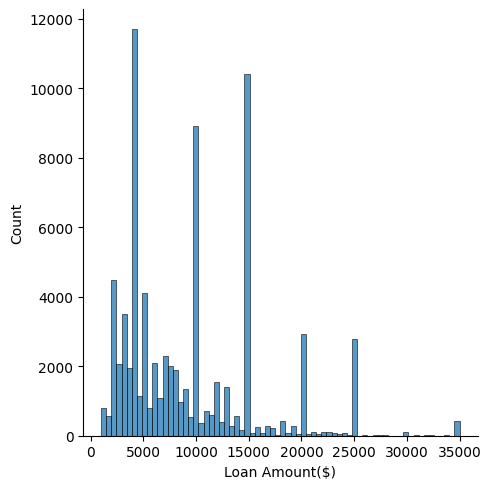

In [374]:
#bins = np.arange(loan_df['BorrowerRate'].min(), loan_df['BorrowerRate'].max()+0.005, 0.005)
sb.displot(loan_df['LoanOriginalAmount'], kde=False)
plt.xlabel('Loan Amount($)');

There are very large spikes in frequency at bars with every 5000dollars increment (e.g. $5000, 10000, 15000, 20000); frequency quickly trails off until the next spike. These probably represent standard loan amounts or borrower prefers such loan amount.The plot also reveals that the most frequent loan amount are 5000, 10000, 15000, they are below average and I could predict that most borrowers took smaller loans than larger loans.

*Let's take a look at the distribution of the ListingCategory to see the various reasons Loans are acquired by Borrowers and observe the most prominent reason.*

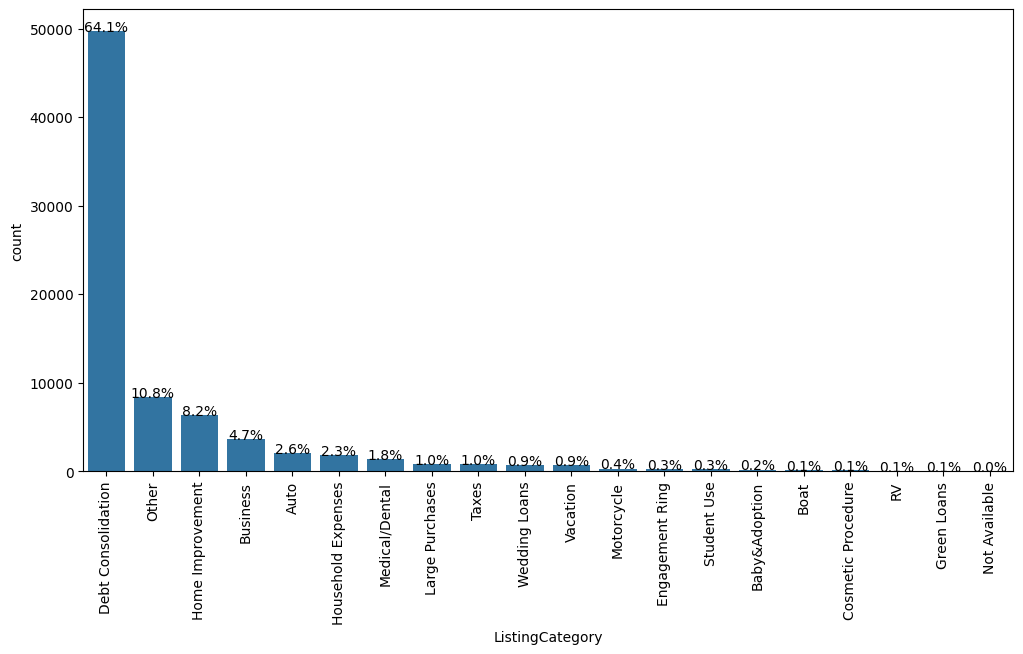

In [375]:
#configuring the figure size
plt.figure(figsize = [12,6])

#getting the unique value in ListingCategory
#and returning the frequenct in decending order
category_type = loan_df['ListingCategory'].value_counts()
category_order = category_type.index

#generate the sum of all the values in ListingCategory
List_val = loan_df['ListingCategory'].value_counts().sum()

#print the text (proportion) below the bars
base_color = sb.color_palette()[0]
sb.countplot(data=loan_df, x='ListingCategory', 
             color=base_color, order=category_order);


# Recalculating the category_order.
category_order = loan_df['ListingCategory'].value_counts()

# getting the tick  location and orientation
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = category_type[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/List_val)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

The plot shows that 64.1% of borrowers took loans for Debt Consolidation. I expected to see more Borrowers take loans for Business or Medicals but we have 4.7% and 1.8% of borrowers taking loans for them respectively. 1% of people also took loans for Tax and 2.3% took loans for house expenses.

*We'll observe the distribution of Average Income, to see if we have more Borrowers that are high or low income earners.*

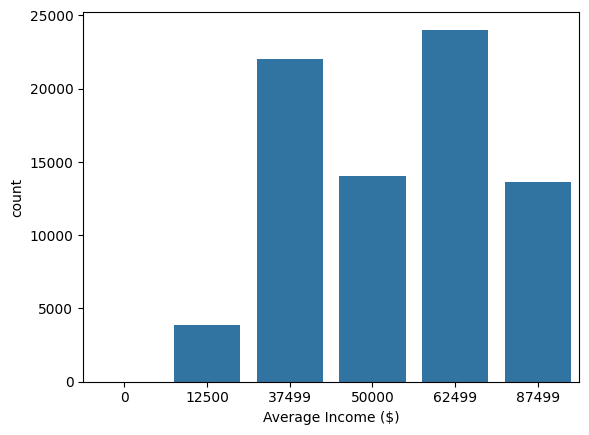

In [376]:
base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, x= 'AverageIncome', color= base_color)
plt.xlabel('Average Income ($)');

The highest average Income for the borrowers is 87,499 dollars and about 15,000 borrowers are within this Income level. The next is 62,499 dollars which have the highest frequency of about 24,500 borrowers. We have more high income Borrowers than low income borrowers. 

The income might be a determining factor Prosper Bank uses in give out loans, since we have less than 5,000 people with an average income of 12,500 dollars(low income earners) which is very low compared to the frequency of other incomes.

*We'll look at the distribution of Employment Status. What's the frequency of those Unemployed yet giving loans? How do we compare those that are Employed and UnEmployed?*

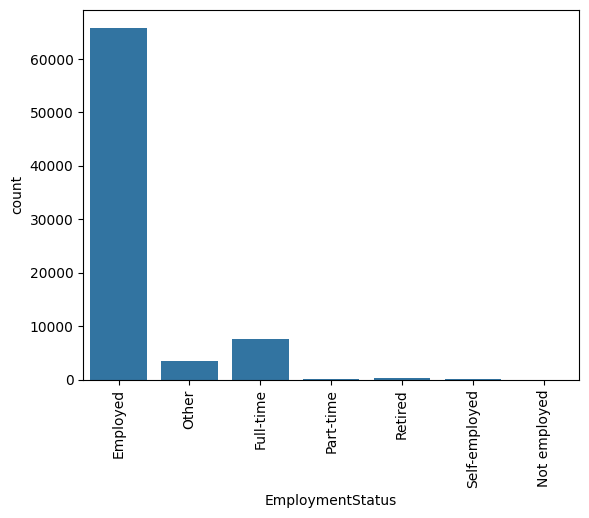

In [377]:
base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, x= 'EmploymentStatus', color= base_color)
plt.xticks(rotation= 90);

We can observe a very minimal level of UnEmployed borrowers. Just very few borrowers are Not Employed
We can deduce that 99.5% of Loans are giving to those that are Employed, Self Employed or Retired.

There's an inconsistent category as shown from the plot. Full-time and Part-time should still be categorized as Employed. I will tidy the data and make another plot.

In [378]:
# Replace Fulltime and Part-time with Employed
loan_df['EmploymentStatus'].replace(['Full-time', 'Part-time'], 'Employed', inplace=True)

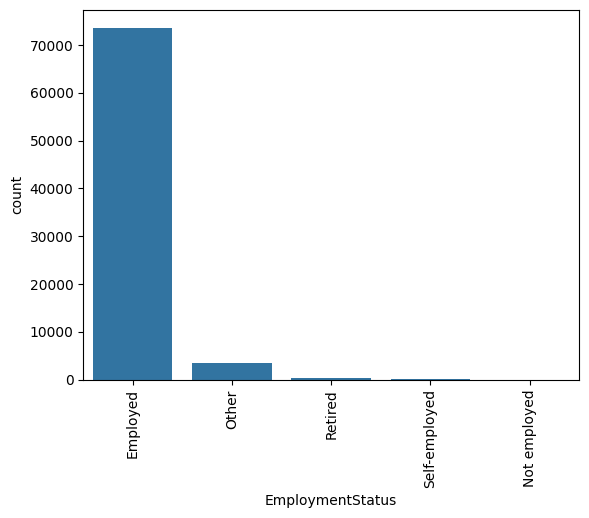

In [379]:
# Plot tidied data
base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, x= 'EmploymentStatus', color= base_color)
plt.xticks(rotation= 90);

95% of the borrowers are Employed. Employment status is probably one of the greatest criteria in selecting those that will be given loans by the Bank

Let's compare Borrowers who are House owners and those who are not. Could that be a factor?

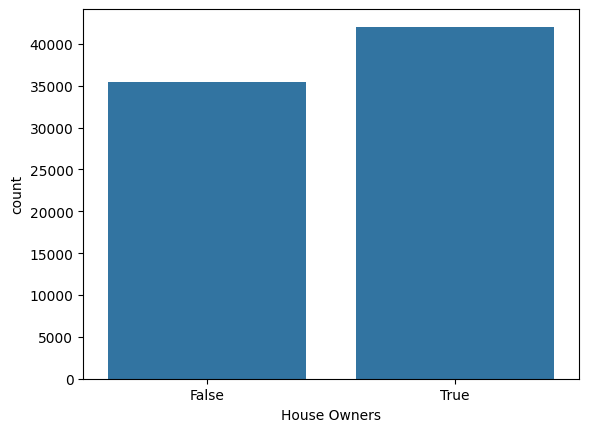

In [380]:
base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, x= 'IsBorrowerHomeowner', color= base_color)
plt.xlabel('House Owners');

We have more Borrowers that are House owners. The difference between those that are House owners and those that are not House owners is about 7000. It's not enough difference to conclude that being an House owner is a criteria to give loans but it's definitely an advantage.

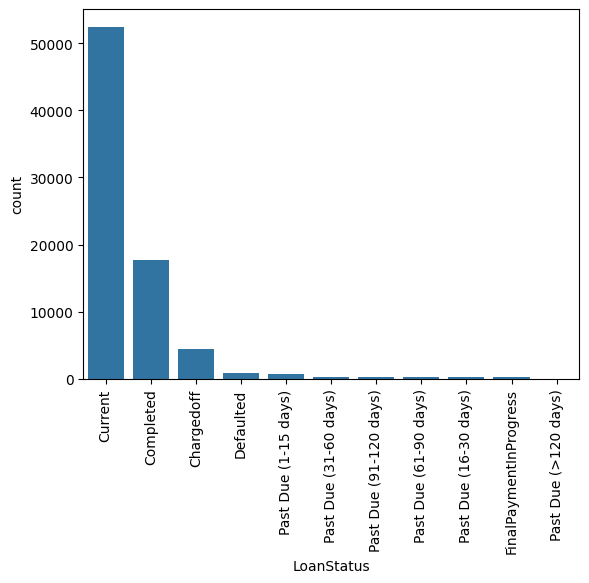

In [381]:
#create order
status_order = loan_df.LoanStatus.value_counts().index

# set color
base_color = sb.color_palette()[0]

#plot 
sb.countplot(data= loan_df, x= 'LoanStatus', color= base_color, order= status_order)
plt.xticks(rotation= 90);

Majority of the loans are still active with status 'Current'. There are close to 18,000 already completed loans. Chargeoff loans signifies a loss for the bank, we have about 4500 of them which is about 0.05% of the total loans. I won't consider this to be a very bad loss to the Bank

Let's take a look at the distribution of another variable of Interest: ProsperRating

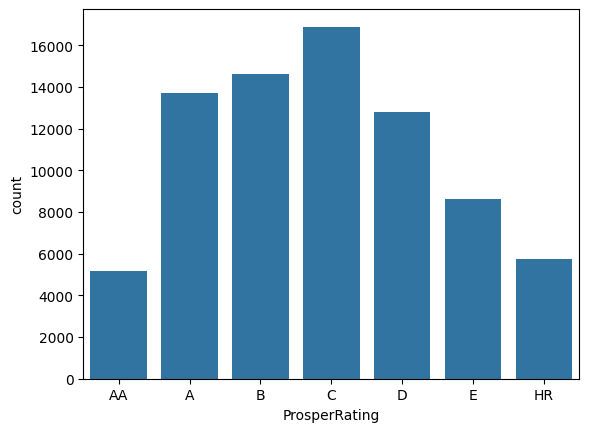

In [382]:
# ordinal variables

base_color = sb.color_palette()[0]

#plot
sb.countplot(data= loan_df, x= 'ProsperRating', color= base_color);


The prosper ratings of the Borrowers is quite fair. Prosper rating of C has the highest frequency followed by rating B and A. The rating with least frequency is AA. AA must be a very difficult rating to have and probably only few borrowers can acquire that level. It will be intresting to see the amount of loan received and income of borrowers with rating AA in subsequent visualizations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was no need for axis transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed an inconsistent category in the EmploymentStatus feature which was cleaned.

## Bivariate Exploration


To start off with, I want to look at the pairwise correlations present between some of the numerical features in the data.

In [383]:
# Get all numerical columns
result = loan_df.select_dtypes(include='number')
print(result.columns)

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines',
       'OpenCreditLines', 'CurrentDelinquencies', 'AmountDelinquent',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'PercentFunded',
       'Investors', 'AverageIncome', 'CreditScore'],
      dtype='object')


In [384]:
# list of numerical columns to narrow my analysis
numeric_vars = ['BorrowerRate', 'LenderYield','ProsperScore', 
               'CurrentDelinquencies','LoanOriginalAmount', 'AverageIncome', 'OpenCreditLines', 'Investors',
                'CreditScore', 'LP_InterestandFees','EstimatedLoss', 'StatedMonthlyIncome','MonthlyLoanPayment', 'Term']

<AxesSubplot: >

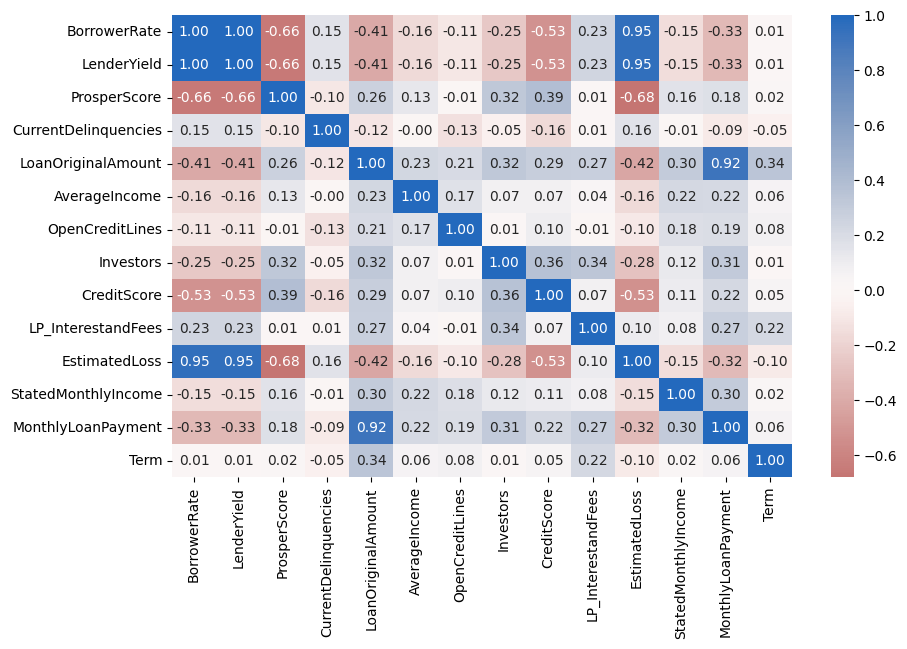

In [385]:
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)

In [386]:
# features to be plotted in PairGrid
numeric_vars_2 = ['BorrowerRate','ProsperScore','LoanOriginalAmount', 'CreditScore', 
                  'EstimatedLoss', 'StatedMonthlyIncome','MonthlyLoanPayment', 'OpenCreditLines']

In [387]:
with pd.option_context("display.max_rows", None,'display.max_columns', None):
    display(loan_df[loan_df.OpenCreditLines > 40])

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenCreditLines,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,PercentFunded,Investors,AverageIncome,CreditScore
17057,36,Current,0.21025,0.1734,0.1634,0.15970,0.0624,0.09730,C,5.0,Debt Consolidation,Employed,147.0,True,54.0,42.0,0.0,0.0,0.30,8583.333333,0,18,15000,537.33,9134.6100,6125.36,3009.2500,1.0,176,50000,669.5
21459,36,Current,0.15850,0.1224,0.1124,0.10731,0.0424,0.06491,B,6.0,Debt Consolidation,Employed,49.0,True,54.0,54.0,0.0,0.0,0.28,17500.000000,0,0,15000,499.94,0.0000,0.00,0.0000,1.0,1,50000,709.5
30636,36,Current,0.21290,0.1760,0.1660,0.15519,0.0699,0.08529,C,4.0,Debt Consolidation,Employed,189.0,True,41.0,41.0,0.0,0.0,0.18,16666.666667,0,4,5000,179.76,536.8690,322.28,214.5890,1.0,1,50000,669.5
35723,60,Current,0.26487,0.2394,0.2294,0.20961,0.1175,0.09211,D,4.0,Debt Consolidation,Employed,127.0,False,45.0,44.0,0.0,0.0,0.56,4351.250000,0,3,10000,287.33,568.1011,169.71,398.3911,1.0,1,62499,729.5
40003,36,Completed,0.31308,0.2775,0.2675,0.26080,0.0980,0.16280,D,7.0,Home Improvement,Employed,126.0,True,56.0,45.0,0.0,0.0,0.33,8250.000000,0,39,4500,185.53,4832.0500,4500.00,332.0500,1.0,47,87499,729.5
40041,60,Current,0.16294,0.1399,0.1299,0.12380,0.0449,0.07890,B,9.0,Debt Consolidation,Employed,217.0,True,43.0,41.0,0.0,0.0,0.32,14583.333333,0,6,15000,348.95,1739.0007,885.92,853.0807,1.0,1,50000,789.5
49385,60,Completed,0.28930,0.2632,0.2532,0.24690,0.0975,0.14940,D,2.0,Debt Consolidation,Employed,168.0,True,59.0,48.0,0.0,0.0,0.32,11416.666667,0,19,15000,451.95,20454.0400,15000.00,5454.0400,1.0,188,50000,709.5
62007,36,Current,0.35356,0.3134,0.3034,0.27600,0.1575,0.11850,HR,4.0,Debt Consolidation,Employed,51.0,True,47.0,44.0,0.0,0.0,0.56,6250.000000,0,13,4000,172.76,2073.1200,951.00,1122.1200,1.0,50,87499,629.5
66650,36,Completed,0.27467,0.2399,0.2299,0.22430,0.1000,0.12430,D,5.0,Debt Consolidation,Employed,134.0,True,56.0,45.0,0.0,0.0,0.35,8583.333333,0,31,6500,254.98,7132.0000,6500.00,632.0000,1.0,88,50000,709.5
73684,36,Current,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,A,6.0,Debt Consolidation,Employed,158.0,True,41.0,41.0,0.0,0.0,0.29,6666.666667,0,2,13000,421.86,421.8600,307.14,114.7200,1.0,219,87499,749.5


loan_df.shape= (77543, 31)
loan_sample.shape= (500, 31)


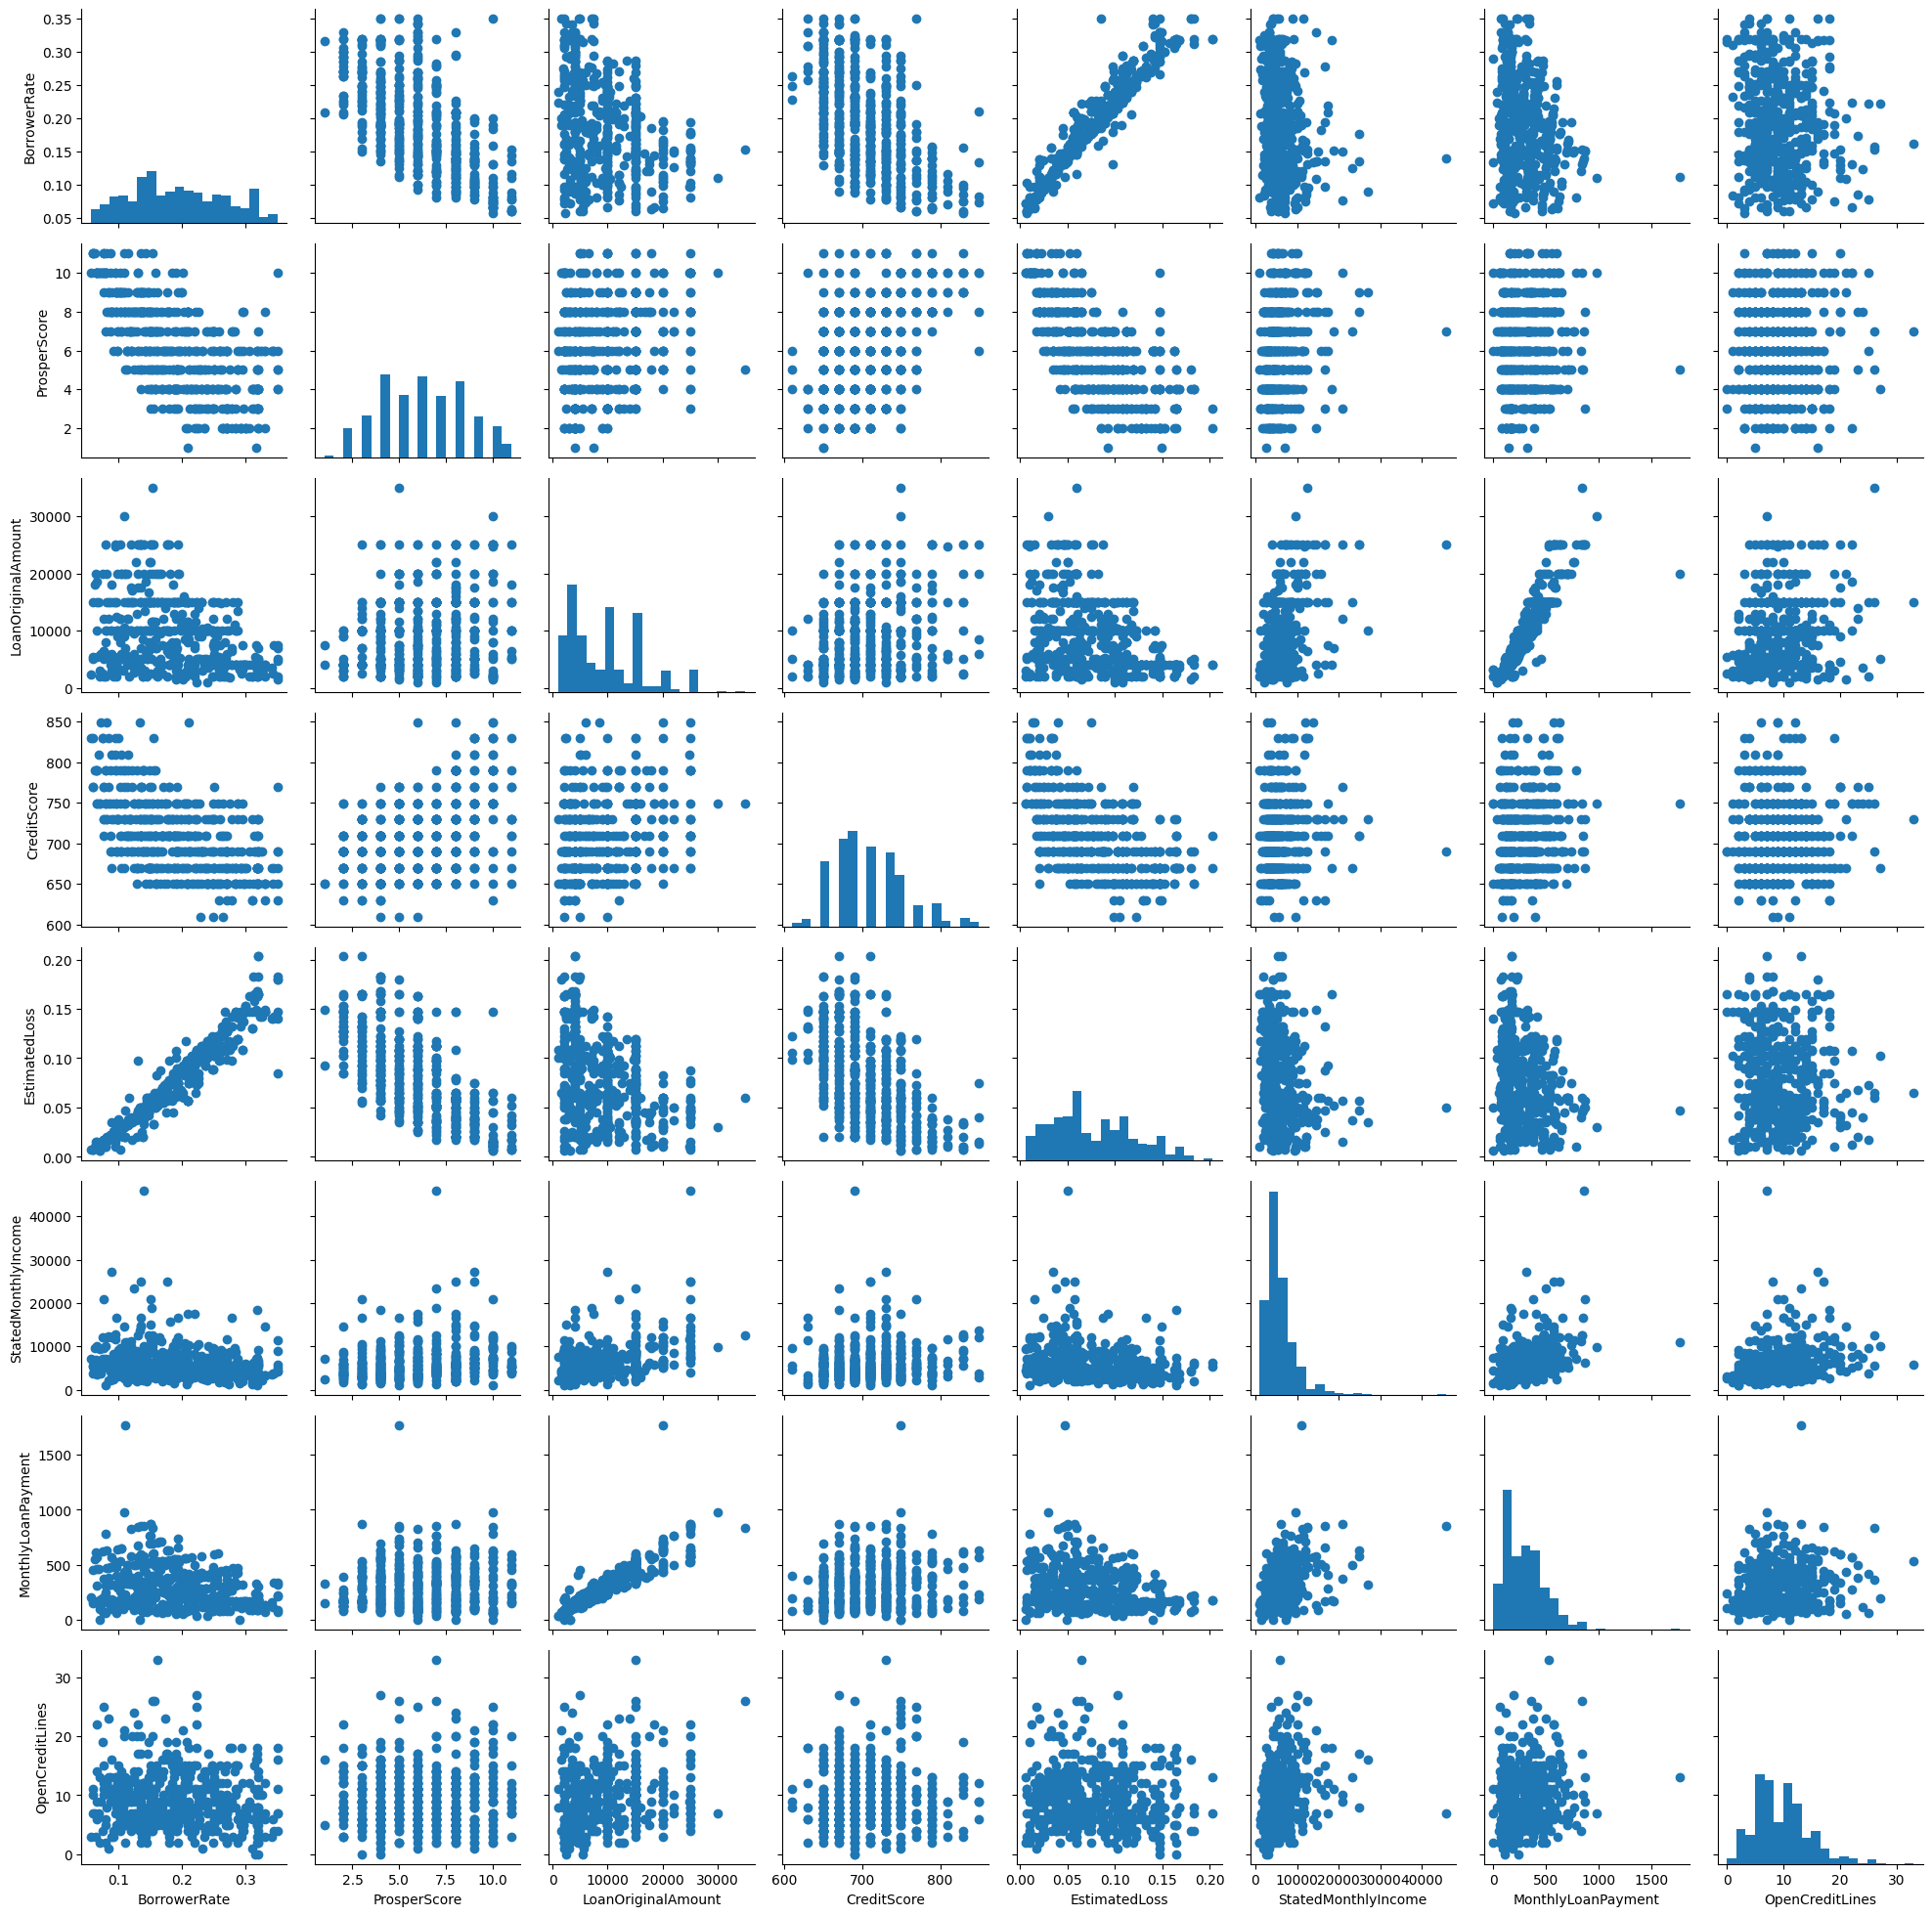

In [388]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
print("loan_df.shape=",loan_df.shape)
loan_sample = loan_df.sample(n=500, replace= False)
print("loan_sample.shape=",loan_sample.shape)

g = sb.PairGrid(data=loan_sample, vars= numeric_vars_2)
g.map_diag(plt.hist, bins= 20)
g.map_offdiag(plt.scatter);

The Estimated loss(principal loss on charge-off) is highly correlated with Borrower Rate or Interest Rate, Lender Yield, Estimated Effective Yield. This means that Lenders had more losses and charge-off as reflected from the Estimated Loss from
high interest loans which also yielded high returns for the lender as reflected in the Estimated Yield. We can experience more charge-off status and high risk of loss from high interest loan.

There's also a high negative correlation between Prosper Score, Borrower Rate and Estimated loss. The higher the Prosper score the lesser the Borrower Rate and Estimated loss. The pattern noticed with Prosper Score reducing the Borrower's Rate and Estimated loss is also found with Credit Score but the effect of Prosper score is stronger than Credit Score.

As expected the higher the Borrower's Rate the higher the Lender's Yield. Surprisingly, Large loan amount doesn't necessarily lead to high Borrower's rate. I would have thought that larger loans should equate to larger interest rate but there are instances in our data where Large loan had very low Intrest Rate. 

In [389]:
loan_df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,...,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,PercentFunded,Investors,AverageIncome,CreditScore
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,A,7.0,...,0,10000,318.93,0.00,0.00,0.00,1.0,1,62499,689.5
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,A,9.0,...,16,10000,321.45,5143.20,4091.09,1052.11,1.0,158,37499,809.5
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,D,4.0,...,6,15000,563.97,2819.85,1563.22,1256.63,1.0,20,50000,689.5
5,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,B,10.0,...,3,15000,342.37,679.34,351.89,327.45,1.0,1,50000,749.5
6,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,E,2.0,...,11,3000,122.67,1226.70,604.25,622.45,1.0,1,37499,689.5


In [390]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Term                          77543 non-null  int64   
 1   LoanStatus                    77543 non-null  object  
 2   BorrowerAPR                   77543 non-null  float64 
 3   BorrowerRate                  77543 non-null  float64 
 4   LenderYield                   77543 non-null  float64 
 5   EstimatedEffectiveYield       77543 non-null  float64 
 6   EstimatedLoss                 77543 non-null  float64 
 7   EstimatedReturn               77543 non-null  float64 
 8   ProsperRating                 77543 non-null  category
 9   ProsperScore                  77543 non-null  float64 
 10  ListingCategory               77543 non-null  category
 11  EmploymentStatus              77543 non-null  object  
 12  EmploymentStatusDuration      77543 non-null 

In [391]:
# select categorical columns
cat_vars = loan_df.select_dtypes(include=['category']).columns
cat_vars

Index(['ProsperRating', 'ListingCategory'], dtype='object')

## Q1: We will first consider factors that determines borrowers loan status outcome

**How does ProsperScore and BorrowerRate affect Loan Status?**

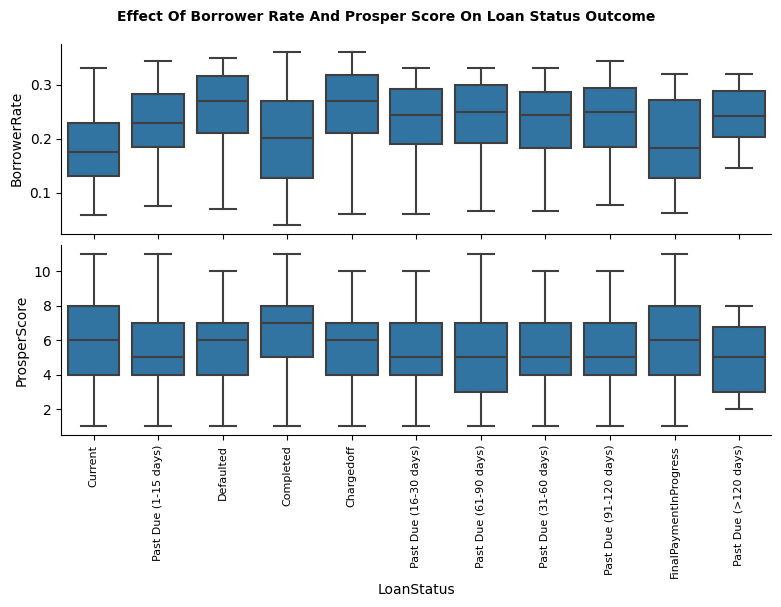

In [392]:
#loan_sample = loan_df.sample(n= 2000, replace= False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    
g = sb.PairGrid(data= loan_df, y_vars= ['BorrowerRate', 'ProsperScore'], 
                x_vars= ['LoanStatus'], height=2, aspect=3)
plt.xticks(rotation=90, fontsize=8)
g.map(boxgrid)
plt.suptitle('Effect of Borrower Rate and Prosper Score on Loan Status Outcome'.title(), y=1, fontsize=10, weight='bold')
g.fig.set_size_inches(8, 6)
g.tight_layout()
plt.show();

The Boxplot reveals that the average Borrowers Rate for Loans with positive status e.g(Completed, Current, Final Payment In Progress) are lesser than Loans with negative status(Chargeoff, Defaulted, Past Due). It simply means Borrowers with positive loan status outcome had lower interest rate compared to borrower with negative Loan status.

Borrowers with Loan Status 'Completed' had the highest Prosper score compared to other status. Borrowers that Completed their loans had the highest average Prosper score. We can deduce that Interest Rate and Prosper score in a large way determines the Loan status. Borrower's with positive Loan Status(Completed, Current, Final Payment In Progress) have lower Interest Rate because their Prosper Score is higher.

**What's the Relationship between LoanStatus and LoanOriginalAmount? How does the distribution of LoanAmount vary for each LoanStatus?** 

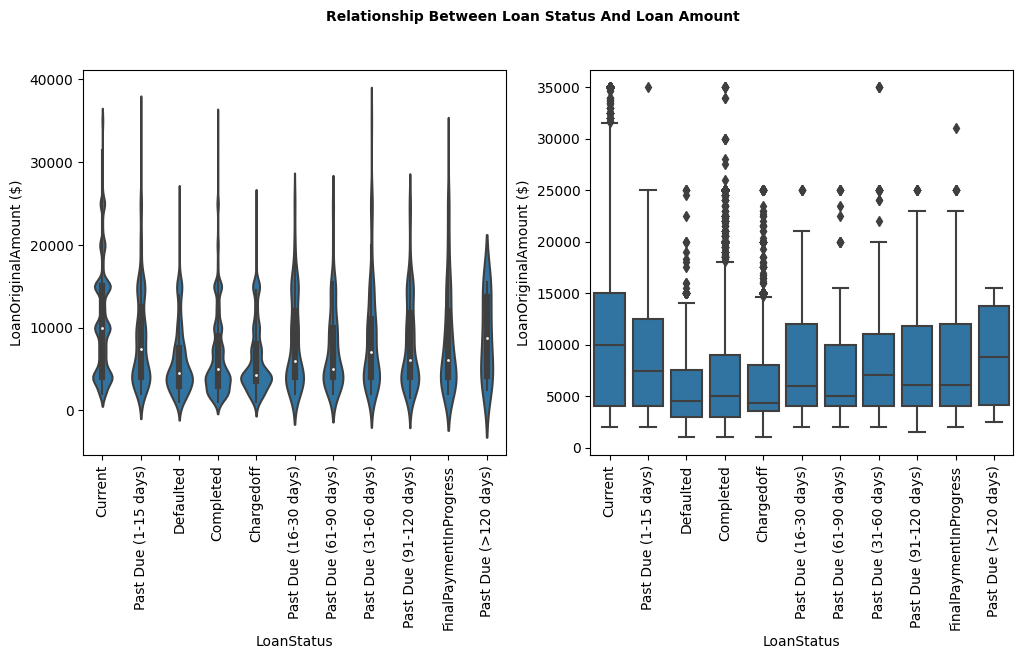

In [393]:
# set size
plt.figure(figsize=[12, 5])
default_color = sb.color_palette()[0]

# First Plot
plt.subplot(1,2,1)   
sb.violinplot(data= loan_df, x='LoanStatus', y= 'LoanOriginalAmount', color= default_color)
plt.xticks(rotation=90)
plt.ylabel('LoanOriginalAmount ($)')

# Second Plot
plt.subplot(1,2,2)     
sb.boxplot(data= loan_df, x='LoanStatus', y= 'LoanOriginalAmount', color= default_color)
plt.xticks(rotation=90)
plt.ylabel('LoanOriginalAmount ($)')
plt.suptitle('Relationship between Loan Status and Loan Amount'.title(), y=1, fontsize=10, weight='bold');

The violin plot reveals that majority of the borrowers for all loan status obtained small loans i.e the Loan Original Amount, mostly within 5,000 dollars. Only few borrowers obtained larger Loan amount. 

Current Loan status shows an increase in Loan Original Amount with an average of 10,000 dollars and maximum of about 32,000 dollars compared to other loan status. Current loans also show the highest distribution for larger loan amount(beyond 10,000 dollars) compared to other status as revealed by the Violin plot.

It can therefore be deduced that Borrowers with Current Loan Status have a greater distribution for Large Loan Amount. Borrowers with this status has the largest average loan amount and obtained the highest loan amount compared to other loan status.

**Does MonthlyLoanPayment affects the Borrowers LoanStatus?**

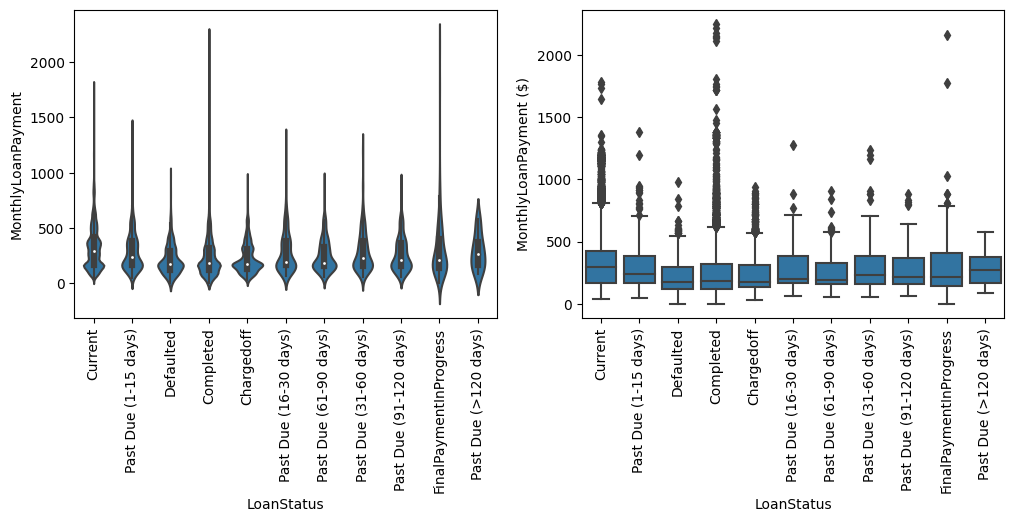

In [394]:
plt.figure(figsize=[12, 4])
default_color = sb.color_palette()[0]

# First Plot
plt.subplot(1,2,1)   
sb.violinplot(data= loan_df, x='LoanStatus', y= 'MonthlyLoanPayment', color= default_color)
plt.xticks(rotation=90);

# Second Plot
plt.subplot(1,2,2)     
sb.boxplot(data= loan_df, x='LoanStatus', y= 'MonthlyLoanPayment', color= default_color)
plt.xticks(rotation=90)
plt.ylabel('MonthlyLoanPayment ($)');

I would have guessed that the Monthly Loan Payment will be a good factor that determines the borrowers Loan status but the plot reveals that the average Monthly Loan payment made by each borrowers for different Loan status are similar, except that Current Loan status and those Past Due(1-15 days) have the highest. It's difficult to get any insight because there's not much of a notable difference.

**Are there trends between MonthlyLoanPayment and LoanAmount for different LoanStatus?**

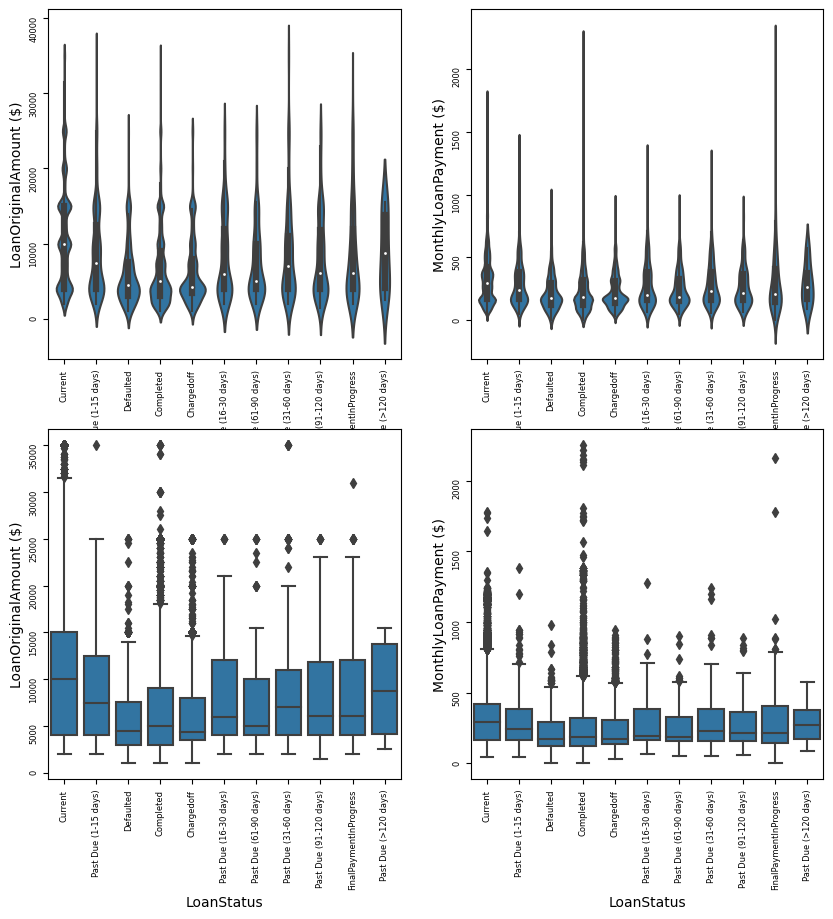

In [395]:
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [10,10])
default_color = sb.color_palette()[0]
y_vars= ['LoanOriginalAmount', 'MonthlyLoanPayment']
for i in range(len(y_vars)):
    var = y_vars[i]
    sb.violinplot(data= loan_df, x='LoanStatus', y= y_vars[i], ax = ax[0, i], color= default_color)
    ax[0, i].set_ylabel( y_vars[i]+ ' ($)' )
    ax[0, i].tick_params(labelrotation=90, labelsize= 6);
    
    sb.boxplot(data= loan_df, x='LoanStatus', y= y_vars[i], ax = ax[1, i], color= default_color)
    ax[1,i].tick_params(labelrotation=90, labelsize= 6)
    ax[1, i].set_ylabel( y_vars[i]+ ' ($)' )
    

These plots reveals that Loan Original Amount and Monthly Loan Payment follows same trend or pattern looking at their mean very closely. 

We can therefore deduce that Borrowers with Current Loan Status have the highest distribution for larger Loan Amount, highest average Loan amount and make the highest Monthly loan Payment than other Loan status.

It might be worth investigating this two features using other plots. 

**What's the BorrowerRate and LenderYield for each Loan Status? Does High BorrowerRate equate to High Lender Yield? How does BorrowerRate affect the LoanStatus?**

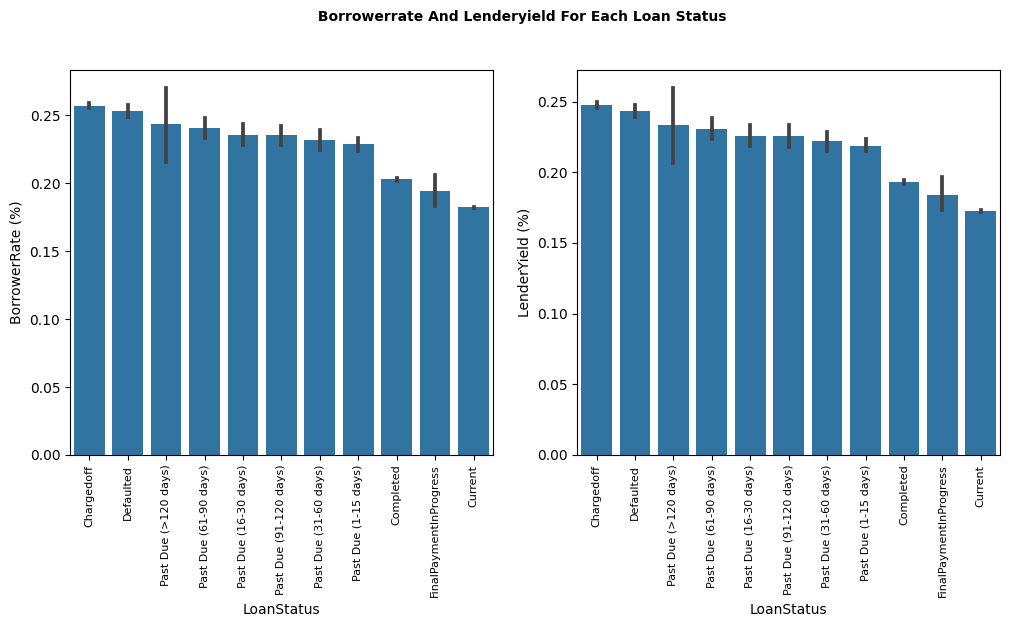

In [396]:
plt.figure(figsize=[12, 5])
color = sb.color_palette()[0]

# Fisrt Plot
plt.subplot(1,2,1)
plot_order = loan_df.groupby('LoanStatus')['BorrowerRate'].mean().sort_values(ascending=False).index
sb.barplot(data=loan_df, x= 'LoanStatus', y='BorrowerRate', order=plot_order, color= color)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('BorrowerRate (%)');

# Second Plot
plt.subplot(1,2,2)
plot_order = loan_df.groupby('LoanStatus')['LenderYield'].mean().sort_values(ascending=False).index
sb.barplot(data=loan_df, x= 'LoanStatus', y='LenderYield', order=plot_order, color= color)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('LenderYield (%)')
plt.suptitle(' BorrowerRate and LenderYield for each Loan Status'.title(), y=1, fontsize=10, weight='bold');

ChargeOff, Defaulted and Past Due Loan Status have higher Borrower Rate and invariably have higher Lender Yield. High interest loan leads to high Lender Yield. We must equally note that the higher the interest rate the more likely we are to have Chargeoff and Defaulted loan status outcome.

**Which is best factor to predict LoanStatus. ProsperScore or CreditScore?**

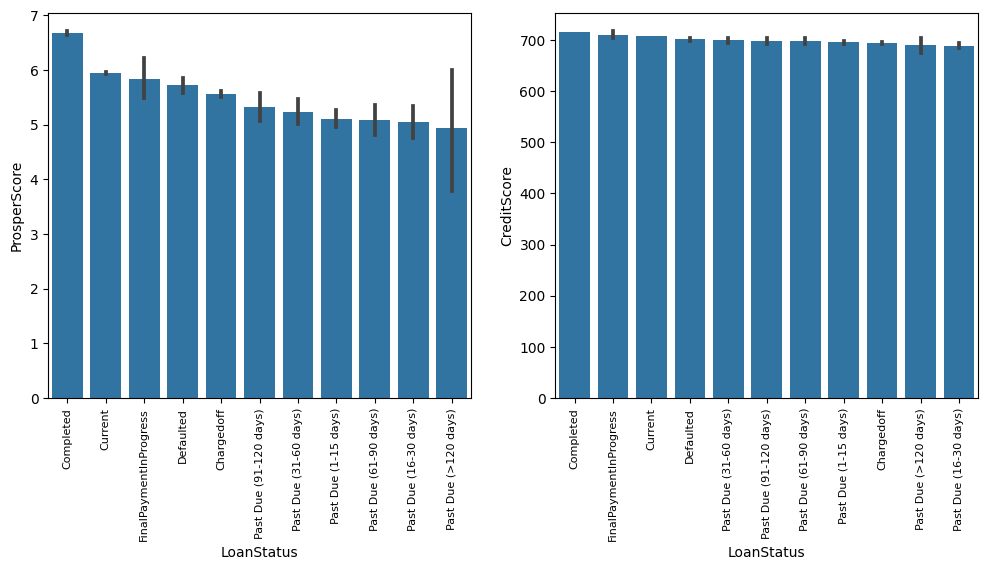

In [397]:
plt.figure(figsize=[12, 5])

color = sb.color_palette()[0]

# First plot
plt.subplot(1, 2, 1)
plot_order = loan_df.groupby('LoanStatus')['ProsperScore'].mean().sort_values(ascending=False).index
sb.barplot(data=loan_df, x= 'LoanStatus', y='ProsperScore', order=plot_order, color= color)
plt.xticks(rotation=90, fontsize=8);

# Second Plot
plt.subplot(1, 2, 2)
plot_order = loan_df.groupby('LoanStatus')['CreditScore'].mean().sort_values(ascending=False).index
sb.barplot(data=loan_df, x= 'LoanStatus', y='CreditScore', order=plot_order, color= color)
plt.xticks(rotation=90, fontsize=8);

The Plots suggest that Prosper Score is a good factor to predict borrowers Loan satus than Credit score. 

Borrower with positive loan status outvome (Current, Completed, Final Payment in Progress) have the higest ProsperScore.

### Q2: We will consider Factors that affects the BorrowerRate

**What's the effect of ProsperScore and CreditScore on BorrowerRate?**

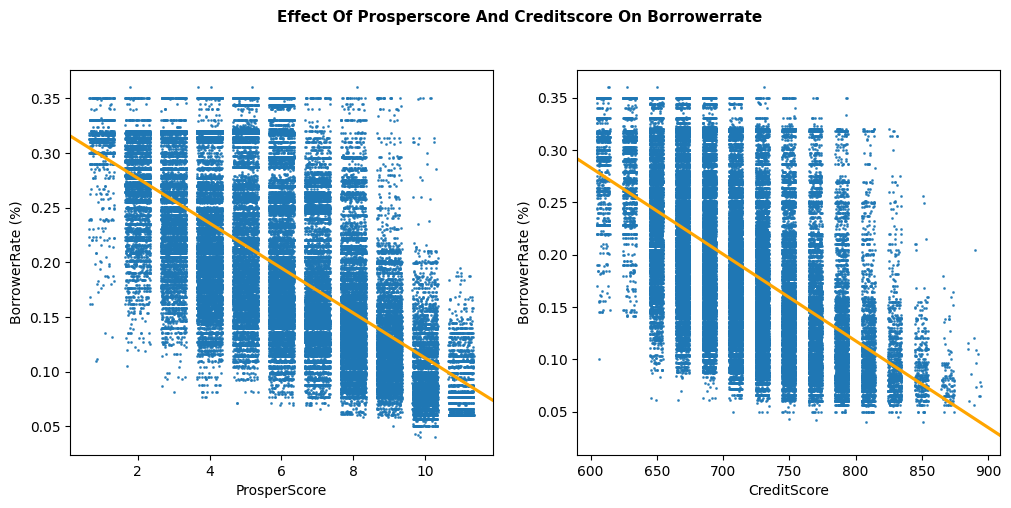

In [398]:
plt.figure(figsize=[12, 5])

# First Plot
plt.subplot(1,2,1)
sb.regplot(data=loan_df, x= 'ProsperScore', y='BorrowerRate', 
           truncate= False, x_jitter=0.35, scatter_kws={'s': 1}, line_kws= {'color': 'orange'})
plt.ylabel('BorrowerRate (%)');

# Second Plot
plt.subplot(1,2,2)
sb.regplot(data=loan_df, x= 'CreditScore', y='BorrowerRate', truncate= False, x_jitter=5, 
           scatter_kws={'s': 1}, line_kws= {'color': 'orange'})
plt.ylabel('BorrowerRate (%)')
plt.suptitle('Effect of ProsperScore and CreditScore on BorrowerRate'.title(), y=1, fontsize=11, weight='bold');

The plot clearly reveals that Borrowers with high ProsperScore and CreditScore are more likely to have a lower Interest or Borrower Rate on their Loans. The higher the ProsperScore and the CreditScore the lower the BorrowerRate.

**How does ProsperRating affect the BorrowerRate?**

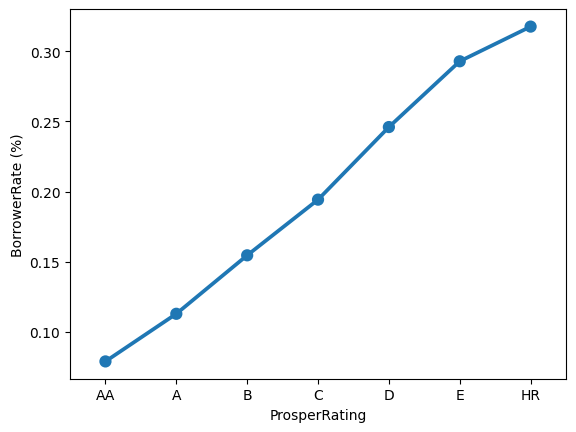

In [399]:
# plot of the ordinal data
sb.pointplot(data=loan_df, x='ProsperRating', y= 'BorrowerRate')
plt.ylabel('BorrowerRate (%)');

Asides ProsperScore and CreditScore, this Plots reveals that the higher the Borrower's ProsperRating the lesser their Interest Rate or Borrower Rate. From previous plot, we can also deduce there is a high positive correlation between ProsperScore and ProsperRating

**What's the effect of LoanOriginalAmount on the BorrowerRate?**

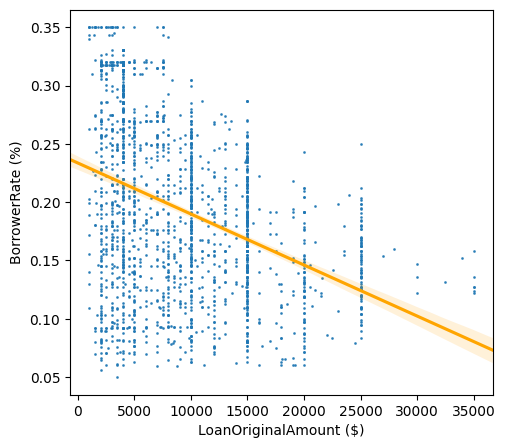

In [400]:
plt.figure(figsize=[12, 5])
loan_sample =loan_df.sample(n=2000, replace=False)

# First Plot
plt.subplot(1, 2, 1)
sb.regplot(data=loan_sample, x= 'LoanOriginalAmount', y='BorrowerRate', truncate= False, 
           scatter_kws={'s': 1}, line_kws= {'color': 'orange'})
plt.ylabel('BorrowerRate (%)')
plt.xlabel('LoanOriginalAmount ($)');

This Plot reveals that borrowers that obtained high Loan Original Amount have lower Borrower Rate. The Higher the loan amount the lower the BorrowerRate.

**Let's see the effect of Loan Term or Period and MonthlyLoanPayment on Borrowers Rate? We will also see how they correlate with each other**

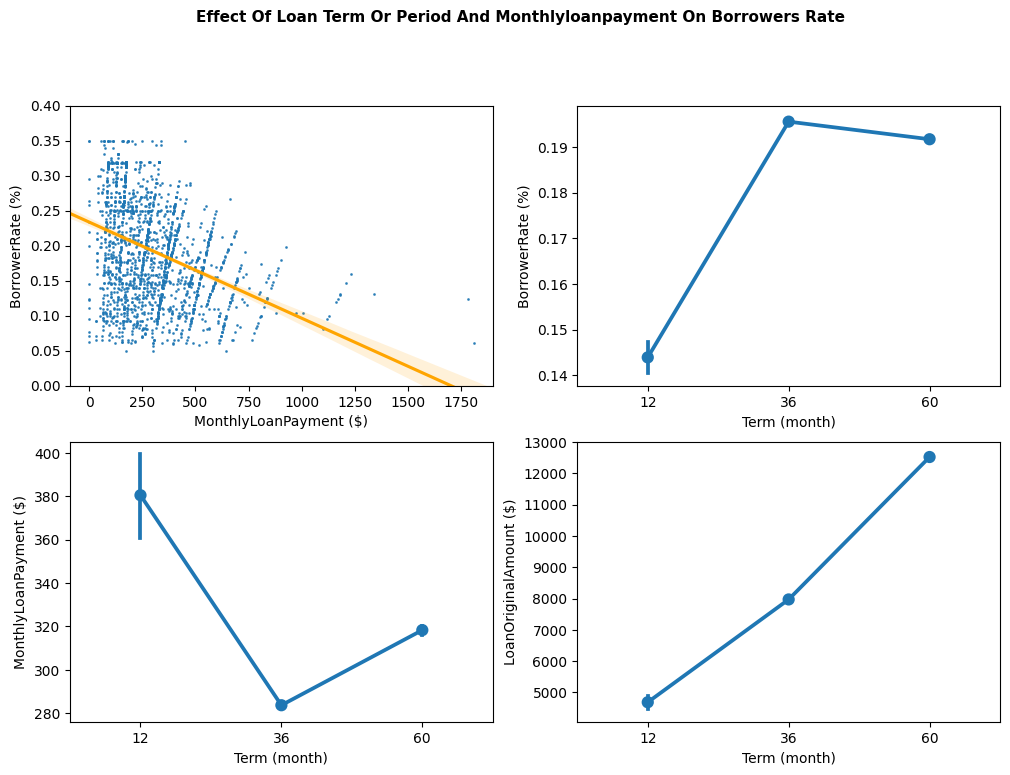

In [401]:
plt.figure(figsize=[12, 8])

# sample 2000 loans so that plots are clearer and they render faster
loan_sample =loan_df.sample(n=2000, replace=False)

# First Plot
plt.subplot(2,2,1)
sb.regplot(data=loan_sample, x= 'MonthlyLoanPayment', y='BorrowerRate', truncate= False, 
           x_jitter= 0.03, scatter_kws={'s': 1},  line_kws= {'color': 'orange'})
plt.ylabel('BorrowerRate (%)')
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylim(0, 0.4);

# Second Plot
plt.subplot(2, 2, 2)
sb.pointplot(data=loan_df, x='Term', y= 'BorrowerRate')
plt.ylabel('BorrowerRate (%)')
plt.xlabel('Term (month)');

# Third Plot
plt.subplot(2, 2, 3)
sb.pointplot(data=loan_df, x='Term', y= 'MonthlyLoanPayment')
plt.xlabel('Term (month)')
plt.ylabel('MonthlyLoanPayment ($)');

# Fourth Plot
plt.subplot(2, 2, 4)
sb.pointplot(data=loan_df, x='Term', y= 'LoanOriginalAmount')
plt.xlabel('Term (month)')
plt.ylabel('LoanOriginalAmount ($)')
plt.suptitle('effect of Loan Term or Period and MonthlyLoanPayment on Borrowers Rate'.title(),
             y=1, fontsize=11, weight='bold');

The higher the Monthly Loan Payment the lower the Borrower's Rate. This is because high Monthly Loan Payment reduces Period or Term in which the Loan is completed and also reduce the Borrower's Rate. **The Third Plot** reveals that Short Term loans(12 months) have a far higher Monthly Loan Payment compared to longer Term loan (12 and 36 months) which is why the Borrower Rate is lower for short Term loan(12 months). **The Second Plot** also reveals that short Term Loans(12 months) have lower Borrower Rate than long term loans(36 and 60 month). We can deduce that the higher Monthly Loan Payment the lower the Borrower Rate and also short Term loans(12 months) have higher Monthly Loan Payment and therefore lower Borrower Rate than Long Term Loans (36 and 60months).

I consider Loan Term of 36 and 60 months to be Long Term loans. **The Second Plot** reveals that Borrowers with Loan Term of 60 months have a lower Borrower Rate than borrowers with Loan Term of 36 months. This is because Borrowers with loan Term of 60 months have a larger Loan Amount than those with Term of 36 months, contrary to what is expected. I expected loans with longers Terms or Period should have the highest interest rate. This wasn't true for loan term of 36 and 60 months because borrowers with loan term of 60 month have higher Loan Amount and I revealed from previous plot that the higher the loan amount the lower the Borrower Rate.  

### Q3 Factors that determines the LoanAmount limit

**How does ProsperRating affect the LoanOriginalAmount?**

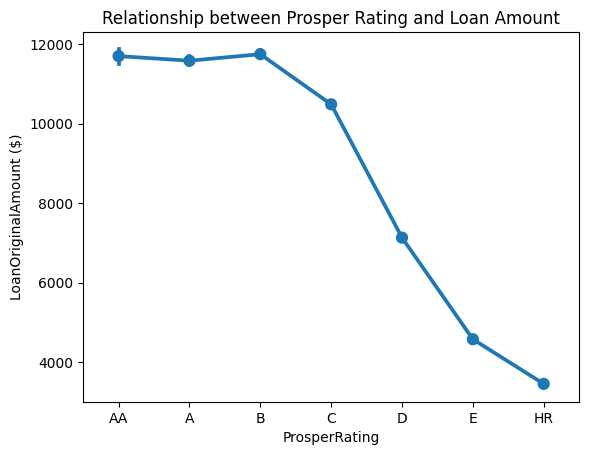

In [402]:
sb.pointplot(data=loan_df, x='ProsperRating', y= 'LoanOriginalAmount')
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Relationship between Prosper Rating and Loan Amount');

This plot shows that Borrowers with ProsperRating(AA , A, B) have more chances to be awarded a larger loan amount than other Borrowers. We notice that there was a downward steep from B to C to HR. The sudden change in loan amount from B to C appears that only Borrowers with Prosper Rating from B to AA qualifies for Larger Loan Amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Borrowers with lower borrower rate had better loan status outcome (Completed, current, FinalPaymentInProgress). The higher the Borrower rate the better the likelihood of getting a good loan status outcome.
> 2. Current Loan status had higher distribution of Loan original Amount
> 3. The Loan Amount and Monthly loan payment affects the loan status the same way because they are very correlated
> 4. Borrowers with high prosper score have the good loan status outcome
> 5. The higher the prosper score, prosper rating and credit score the lower the borrower rate
> 6. The higher the Loan original amount the lower the borrower rate
> 7. The higher the borrower rate the higher the lender yield

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Estimated Loss increases as interest rate and lender yield increase

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**How does ProsperScore affect BorroweRate and LenderYield?**

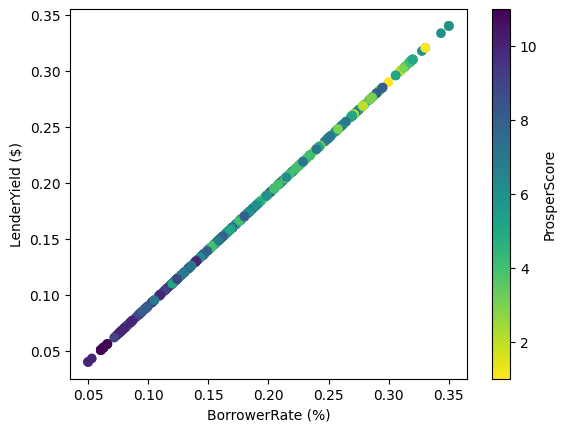

In [403]:
# sample 500 loans so that plots are clearer and they render faster
loan_sample =loan_df.sample(n=500, replace=False)


#create Plot
plt.scatter(data=loan_sample, x='BorrowerRate', y= 'LenderYield',
            c='ProsperScore', cmap='viridis_r')
plt.colorbar(label= 'ProsperScore')
plt.xlabel('BorrowerRate (%)')
plt.ylabel('LenderYield ($)');

The plot revaels that Borrowers with high Prosper Score had a lower Borrower Rate which resulted in a lower Lender Yield. We can deduce that Prosper Bank had more gains or yield from borrowers with lower Prosper Score.

**What's the effect of ProsperRating on LoanAmount, BorrowerRate and LenderYield?**

<Figure size 1500x1000 with 0 Axes>

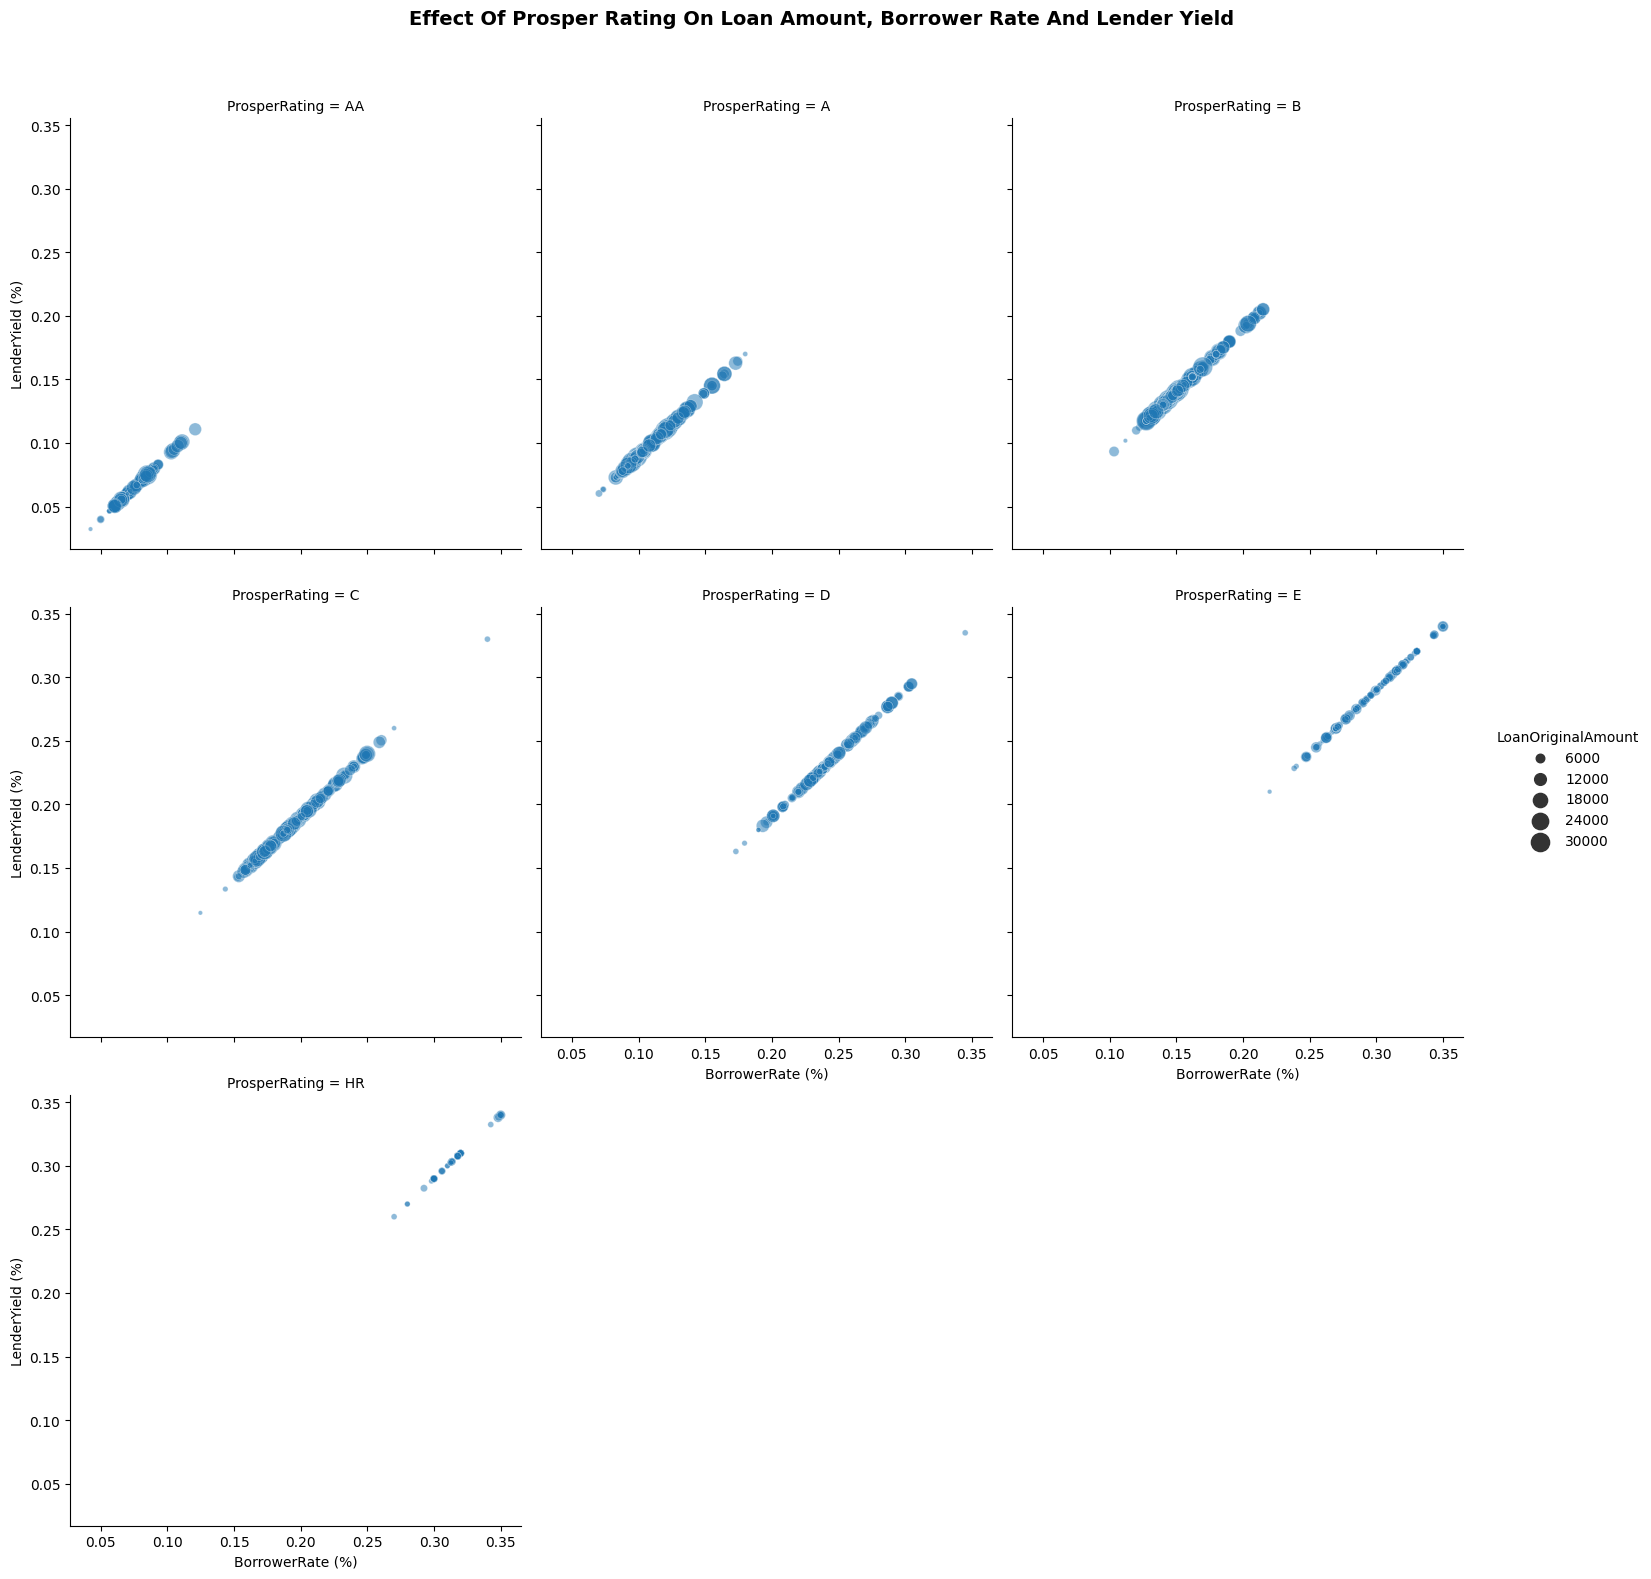

In [404]:
# Set figure size
plt.figure(figsize= [15, 10]);

# sample 2000 loans so that plots are clearer and they render faster
loan_sample =loan_df.sample(n=2000, replace=False)

# plot
g = sb.relplot(data=loan_sample, x='BorrowerRate', y= 'LenderYield',
            size='LoanOriginalAmount', sizes=(10, 200), 
           alpha= 0.5,col_wrap=3, col='ProsperRating', aspect=1)
g.set_ylabels('LenderYield (%)', clear_inner=False)
g.set_xlabels('BorrowerRate (%)')
g.tight_layout()
plt.suptitle('effect of Prosper Rating on Loan Amount, Borrower Rate and Lender Yield'.title(),
             y=1.05, fontsize=14, weight='bold');

The plot reveals that Borrowers with Higher Prosper Ratings(AA, A, B) have the largest Loan Amount. The Loan Amount reduces as Prosper Rating reduce from AA to HR.


The Borrowers Rate for high Prosper Rating is low. The lower the Borrower Rate, the lower the Lender Yield. The Lender Yield generally increased as the Prosper Rating decreased. We can deduce that Borrowers with High Prosper Rating result in lesser yield or gain to Lenders.

**Does Employment status duration affects BorrowerRate for different ProsperRating?**

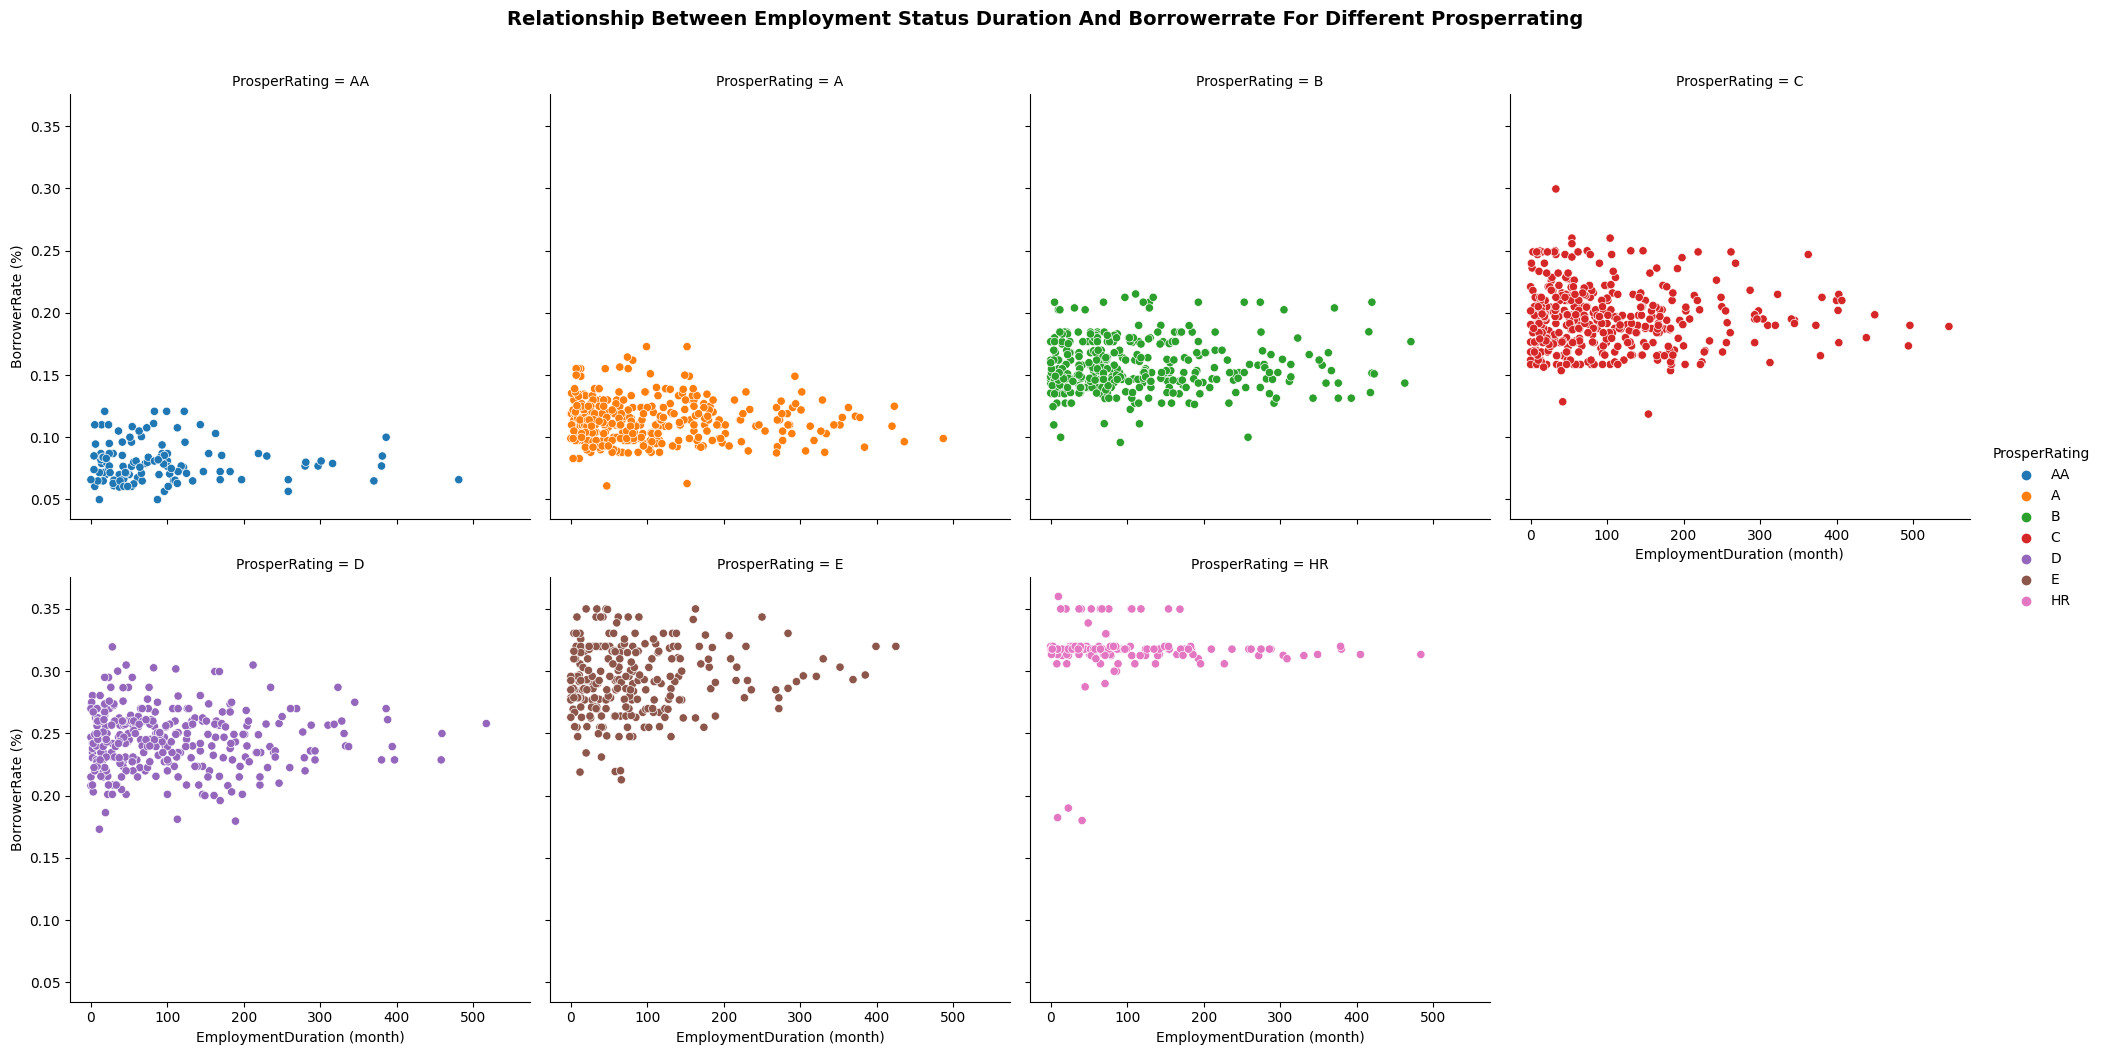

In [405]:
# sample 700 loans so that plots are clearer and they render faster
loan_sample =loan_df.sample(n=2000, replace=False)

# create plot
g = sb.relplot(data=loan_sample, y='BorrowerRate', x= 'EmploymentStatusDuration', 
           hue='ProsperRating', col='ProsperRating', col_wrap=4,  facet_kws = {'sharey': True, 'sharex': True})
g.set_ylabels('BorrowerRate (%)', clear_inner=False)
g.set_xlabels('EmploymentDuration (month)')
plt.suptitle('Relationship Between Employment status duration and BorrowerRate for different ProsperRating'.title(),
             y=1.05, fontsize=14, weight='bold');

The Borrower Rate accross higher Prosper Rating is lower inrespective of the Employment Duration. Borrowers with high Prosper Rating have lower Borrower Rate irrespective of how low or high their Employment Duration is. Borrowers with low Prosper Rating also have high Borrower Rate irrespective of how high or low their Employment Duration is.

**What's the effect of BorrowerRate and LenderYield on EstimatedLoss ?**

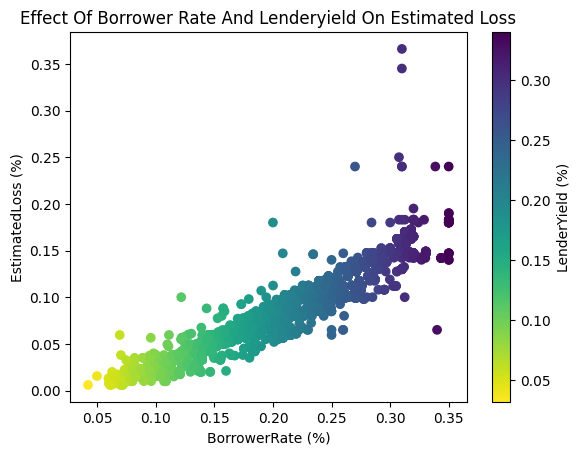

In [406]:
# sample 3000 loans so that plots are clearer and they render faster
loan_sample =loan_df.sample(n=3000, replace=False)

# create plot
plt.scatter(data=loan_sample, x='BorrowerRate', y= 'EstimatedLoss',
            c='LenderYield', cmap='viridis_r')
plt.colorbar(label= 'LenderYield (%)')
plt.xlabel('BorrowerRate (%)')
plt.ylabel('EstimatedLoss (%)')
plt.title('effect of Borrower Rate and LenderYield on Estimated Loss'.title());

Loans with high Borrower Rate and Lender Yield incured the highest Loss. The higher the Borrower Rate and Lender Yield on each loans the higher the chances of the loan resulting in a loss.

**What's the variation in the number of Investors for different ProsperRating accross each LoanStatus?**

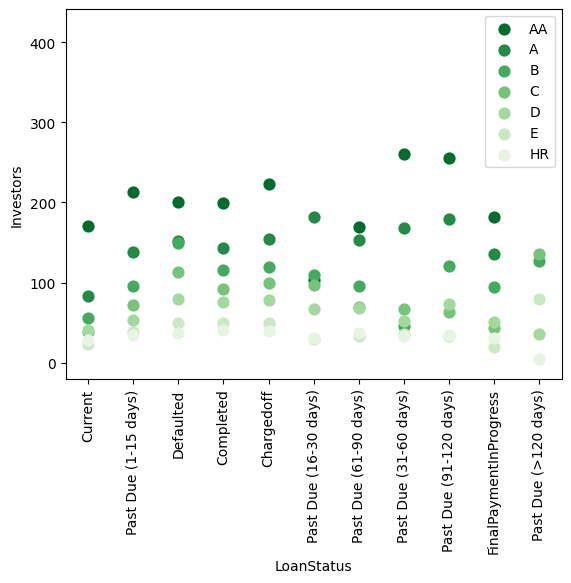

In [407]:
# Create plot
sb.pointplot(data=loan_df, x='LoanStatus', y='Investors', hue='ProsperRating',  
             palette = 'Greens_r', linestyles = '', errwidth=0)
plt.xticks(rotation=90)
plt.legend(loc='upper right');

Borrowers with high Prosper Rating had the highest number of investors accross each Loan Status.

**What's the variation in the StatedMonthlyIncome for different ProsperRating accross each LoanStatus?**

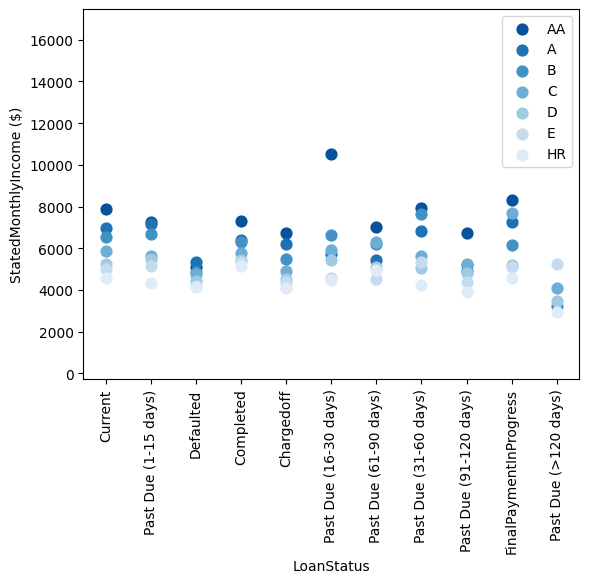

In [408]:
sb.pointplot(data=loan_df, x='LoanStatus', y='StatedMonthlyIncome', hue='ProsperRating',  
             palette = 'Blues_r', linestyles = '', errwidth=0)
plt.xticks(rotation=90)
plt.ylabel('StatedMonthlyIncome ($)')
plt.legend(loc='upper right');

Borrowers with high Prosper rating had the highest Monthly Income accross each Loan Status. 

Montly Income for Defaulted and Past Due(>120 days) Loan status are observed to be lower than other Loan Status (Current, Completed , Final Payment In Progress, and Past Due with leser days). Defaulted and Past Due(>120 days) Loan status have lower Monthly Income irrespective of the level of Prosper Rating. We can deduce that borrowers with lower monthly income are more likely to end up with Default Loan Status.

**What's the variation in the AmountDeliquent for different ProsperRating accross each LoanStatus?**

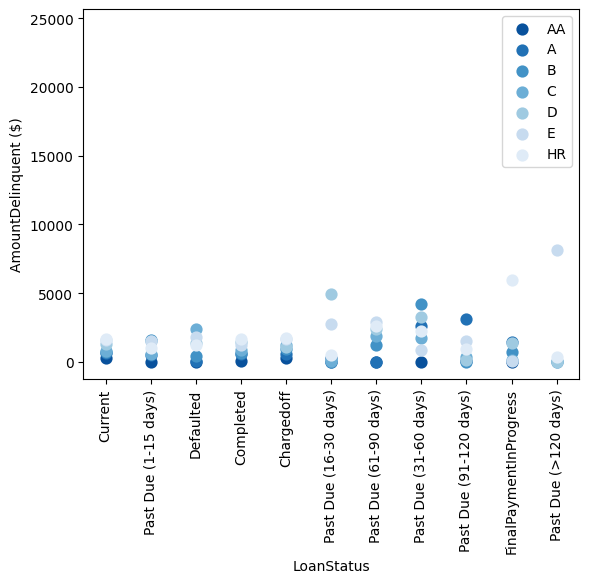

In [409]:
# plot
sb.pointplot(data=loan_df, x='LoanStatus', y='AmountDelinquent', hue='ProsperRating',  
             palette = 'Blues_r', linestyles = '', errwidth=0)
plt.xticks(rotation  =90)
plt.ylabel('AmountDelinquent ($)')
plt.legend(loc='upper right');

The plot reveals that the Amount Deliquent reduces as the Borrower's Prosper Rating increases accross each Loan status. Borrowers with lower level of Prosper Rating had the highest Amount Deliquent.

**What's the variation in the LoanCurrentDaysDeliquent for different ProsperRating accross each LoanStatus?**

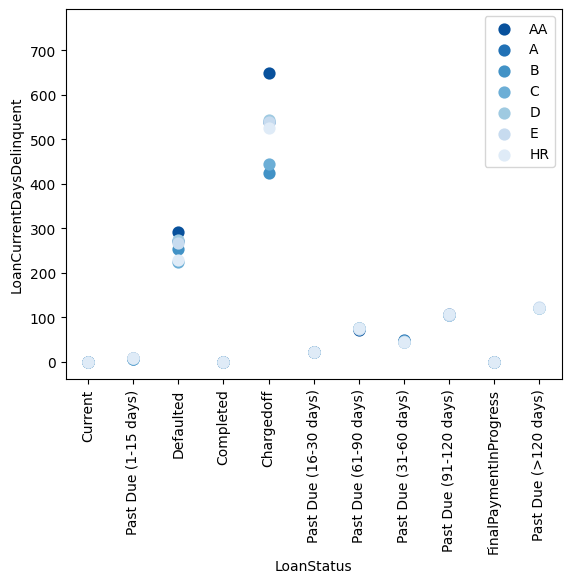

In [410]:
sb.pointplot(data=loan_df, x='LoanStatus', y='LoanCurrentDaysDelinquent', hue='ProsperRating',  
             palette = 'Blues_r', linestyles = '', errwidth=0)
plt.xticks(rotation=90)
plt.legend(loc='upper right');

The Plot reveals that Chargeoff and Defaulted Loan Status had the highest Loan Current Days Deliquent. This Loan Status (Chargeoff and Defaulted) contains Borrowers with more than 200 days Loan Current Days Deliquent. We notice there are Borrowers with good Prosper Rating yet they had Chargeoff and Defaulted Loan Status. It can be deduced that irrespective of Borrowers Prosper Rating, those who exceed 200 days Loan Current Deliquent will be  placed on Defaulted status and those that exceed 400 days Loan Current Deliquent will be Charged off.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of BorrowerRate on both ProsperScore and LenderYield. The multivariate shows that that Lenders had more yield on loans given to borrowers with lower prosper score. I also found out that inrespective of the Employment status duration borrower with good prosper rating have lower borrower rate. Borrower with good Prosper Rating have the highest number of investor, stated monthly income and the lowest amount deliquent accross each loan status.

### Were there any interesting or surprising interactions between features?

>  Defaulted and Past Due(>120 days) Loan status have lower Monthly Income irrespective of the level of Prosper Rating. We can deduce that borrowers with lower monthly income are more likely to end up with Default Loan Status. Irrespective of Borrowers Prosper Rating, those who exceed 200 days Loan Current Deliquent will be placed on Defaulted status and those that exceed 400 days Loan Current Deliquent will be Charged off. The higher the Borrower Rate and Lender Yield on each loans the higher the chances of the loan resulting in a loss.

## Conclusions
>1. Borrower's with good Loan outcome status(Completed, Current, Final Payment In Progress) have lower Interest Rate because their Prosper Score is higher.
>2. There are more distribution of small loans than large loans in our data. However, Borrowers with current loan status outcome shows the highest distribution for larger loan amount(beyond 10,000 dollars) compared to other loan status outcome. 
>3. Borrowers with high ProsperScore, CreditScore and good Prosper Rating have a lower Interest Rate or Borrower Rate on their Loans.
>4. The Higher the loan amount the lower the BorrowerRate. Borrowers with good Prosper Ratings (AA, A, B) qualify for larger loans and they all have lower Borrower Rate.
>5. The higher the Monthly Loan Payment, the lower the Borrower Rate.Short Term loans(12 months) have a far higher Monthly Loan Payment than longer Term loan (12 and 36 months) which is why the Borrower Rate is lower for short Term loan(12 months) than long term loans. I consider Loan Term of 36 and 60 months to be Long Term loans. Borrowers with Loan Term of 60 months have a lower Borrower Rate than borrowers with Loan Term of 36 months. This is because Borrowers with loan Term of 60 months have a larger Loan Amount than those with Term of 36 months.
>6.  Borrowers with high Prosper Score have lower Borrower Rate and result to lower Lender Yield. Lenders have more gains or yield from borrowers with lower Prosper Score.
>7. The Borrower Rate accross higher Prosper Rating is lower inrespective of their Employment Duration.
>8. The higher the Borrower Rate and Lender Yield on each loans the higher the chances of the loan resulting in a loss.
>9. Borrower with good Prosper Rating have the highest number of investors, stated monthly income and the lowest amount deliquent accross each loan status.